#Birdcall Recognition using a Deep CNN
##Contents:
<ul type="none">
  <li>Imports</li>
  <li>Data Handling</li>
    <ul>
      <li>Audio Preperation</li>
      <li>Spectrogram Creation</li>
      <li>Data Preperation and Insights</li>
    </ul>
  <li>Training</li>
    <ul>
      <li>Defining Values</li>
      <li>Model Architecture Search</li>
        <ul>
          <li>Model 1</li>
          <li>Model 2</li>
          <li>Model 3</li>
          <li>Model 4</li>
          <li>Model 5</li>
          <li>Model 6</li>
          <li>Model 7</li>
        </ul>
      <li>Manual Hyperparameter Search</li>
        <ul>
          <li>Model 8</li>
          <li>Model 9</li>
          <li>Model 10</li>
          <li>Model 11</li>
          <li>Model 12</li>
        </ul>
      <li>Grid Search</li>
        <ul>
          <li>Model Architecture 1</li>
          <li>Model Architecture 2</li>
        </ul>
      <li>Testing the Two Best Models</li>
        <ul>
          <li>Model 13 (Pooling)</li>
          <li>Model 13 (Pooling)</li>
          <li>Model 13 (Pooling)</li>
          <li>Model 14 (Flatten) comparison</li>
          <li>Model 14 (Flatten) comparison</li>
        </ul>
        <li>Using All recommended Hyperparameters</li>
        <ul>
          <li>Model 13 (Pooling)</li>
          <li>Model 13 (Pooling)</li>
          <li>Model 13 (Pooling)</li>
        </ul>
        <li>Larger Architecture</li>
        <ul>
          <li>Increase Flatten</li>
          <li>Increase Pooling</li>
          <li>Increase Learning Rate To 0.001</li>
          <li>Reduce Neurons</li>
          <li>Reduce Layers</li>
          <li>Reduce Neurons and Layers</li>
          <li>Remove Dropout layer</li>
          <li>Best Architecture But With Flatten Layer</li>
      <li>Trialling Augmented Data</li>
         <ul>
          <li>Data Preperation</li>
          <li>Model Training</li>
          <li>Parameter Comparison</li>
        </ul>
    </ul>
     


#Imports

In [ ]:
!pip install visualkeras
!pip install keras-tuner
!pip install pydub

from sklearn.metrics import classification_report
import keras_tuner as kt
import visualkeras
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import wave
import contextlib
from sklearn.model_selection import train_test_split
import seaborn as sns
from IPython.display import Audio
from scipy.io import wavfile
from collections import defaultdict

from skimage import data,color,feature
from skimage.color import rgb2gray
from itertools import chain
from sklearn.svm import SVC
import pickle

from pydub import AudioSegment
from pydub.utils import make_chunks

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import tree
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.inspection import DecisionBoundaryDisplay

import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input
from keras.optimizers import RMSprop, Adam, SGD
from keras.applications import vgg16
from numpy import asarray
from numpy import save
import pickle
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from PIL import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

#Data Handling

###Audio Preperation

###Spectrogram Creation

In [ ]:
RANDOM_SEED = 1337
SAMPLE_RATE = 32000
FMIN = 500
FMAX = 12500

def createSpectrogram(folder, data_list, save_to):
  audio_files = os.listdir('/content/drive/MyDrive/DP_DATASET/' + folder)
  for audio in audio_files[:800]:
    birdcall, sr = librosa.load('/content/drive/MyDrive/DP_DATASET/' + folder + '/' + audio, sr=SAMPLE_RATE)
    hop_length = 1007
    S = librosa.feature.melspectrogram(y=birdcall, sr=SAMPLE_RATE, n_fft=1024, hop_length=hop_length, n_mels=48, fmin=FMIN, fmax=FMAX)
    mel_spec = librosa.power_to_db(S, ref=np.max)
    # Normalize
    mel_spec -= mel_spec.min()
    mel_spec /= mel_spec.max()
    save_path = '/content/drive/MyDrive/DP_DATASET/' + save_to + '/' + audio + '.png'
    im = Image.fromarray(mel_spec * 255.0).convert("L")
    im.save(save_path)
    data_list.append(im)

In [ ]:
wren = []
createSpectrogram("WREN_SPEC", wren, "wren_spectrogram")
blackbird = []
createSpectrogram("BLACKBIRD_SPEC", blackbird, "blackbird_spectrogram")
robin = []
createSpectrogram("ROBIN_SPEC", robin, "robin_spectrogram")
great_tit = []
createSpectrogram("GTIT_SPEC", great_tit, "gtit_spectrogram")

In [ ]:
len(wren)

786

In [ ]:
len(blackbird)

800

In [ ]:
len(robin)

800

In [ ]:
len(great_tit)

800

###Read Spectrograms

In [ ]:
def readSpectrograms(folder, bird_list):
  path = "/content/drive/MyDrive/DP_DATASET/" + folder
  valid_images = [".jpg",".gif",".png",".tga"]
  for f in os.listdir(path):
      ext = os.path.splitext(f)[1]
      if ext.lower() not in valid_images:
          continue
      bird_list.append(Image.open(os.path.join(path,f)))

In [ ]:
wren = []
blackbird = []
robin = []
great_tit = []
readSpectrograms("wren_spectrogram", wren)
readSpectrograms("blackbird_spectrogram", blackbird)
readSpectrograms("robin_spectrogram", robin)
readSpectrograms("gtit_spectrogram", great_tit)

###Data Preparation

In [ ]:
y = [] #list of labels

for i in range(len(wren)):
  y.append(0)
for i in range(len(blackbird)):
  y.append(1)
for i in range(len(robin)):
  y.append(2)
for i in range(len(great_tit)):
  y.append(3)

y = np.array(y)

In [ ]:
# Convert to numpy array
wren = np.array(wren, dtype='float32')

# Normalize between 0.0 and 1.0
# and exclude samples with nan
for spec in wren:
  spec -= spec.min()
  spec /= spec.max()
  if not spec.max() == 1.0 or not spec.min() == 0.0:
    continue
  spec = np.expand_dims(spec, -1)


blackbird = np.array(blackbird, dtype='float32')
for spec in blackbird:
  spec -= spec.min()
  spec /= spec.max()
  if not spec.max() == 1.0 or not spec.min() == 0.0:
    continue
  spec = np.expand_dims(spec, -1)


robin = np.array(robin, dtype='float32')
for spec in robin:
  spec -= spec.min()
  spec /= spec.max()
  if not spec.max() == 1.0 or not spec.min() == 0.0:
    continue
  spec = np.expand_dims(spec, -1)


great_tit = np.array(great_tit, dtype='float32')
for spec in great_tit:
  spec -= spec.min()
  spec /= spec.max()
  if not spec.max() == 1.0 or not spec.min() == 0.0:
    continue
  spec = np.expand_dims(spec, -1)

In [ ]:
Data = np.concatenate([wren, blackbird, robin, great_tit])

X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.2, random_state=77, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=77, shuffle=True)

###Insights

In [ ]:
def createPieChartOfDistribution(y_labels, classes, title):
  fig = plt.figure(figsize =(10, 7))
  labels, frequency = np.unique(y_labels, return_counts = True)
  plt.pie(frequency, labels=classes, colors=sns.color_palette('viridis_r'), autopct='%.0f%%')
  plt.title(title)

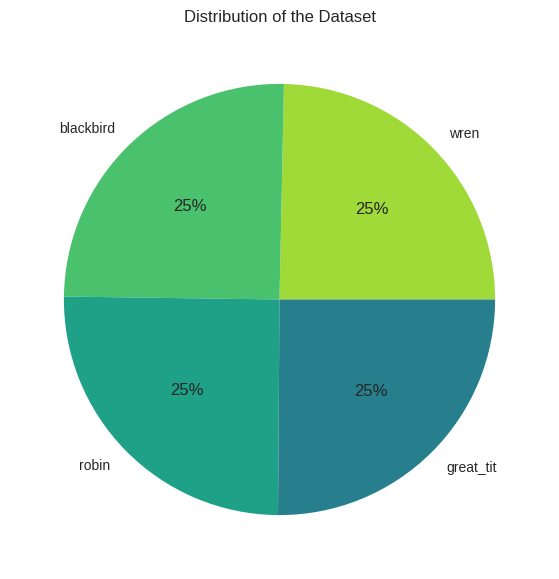

In [ ]:
createPieChartOfDistribution(y, ["wren", "blackbird", "robin", "great_tit"], "Distribution of the Dataset")

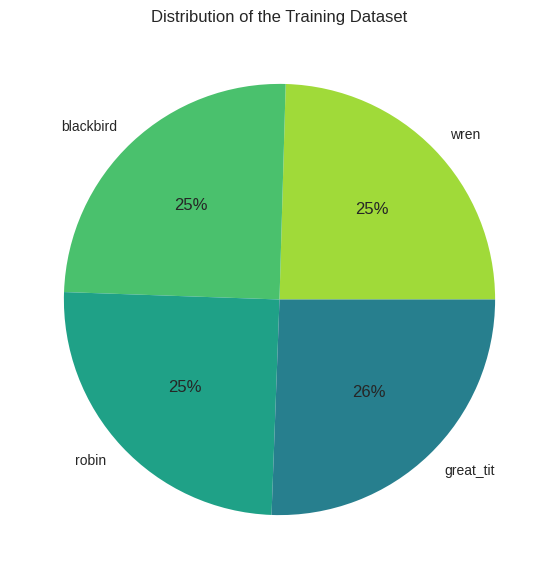

In [ ]:
createPieChartOfDistribution(y_train, ["wren", "blackbird", "robin", "great_tit"], "Distribution of the Training Dataset")

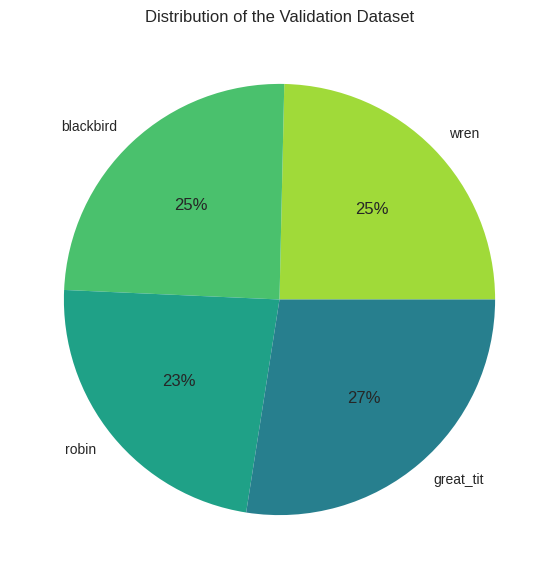

In [ ]:
createPieChartOfDistribution(y_val, ["wren", "blackbird", "robin", "great_tit"], "Distribution of the Validation Dataset")

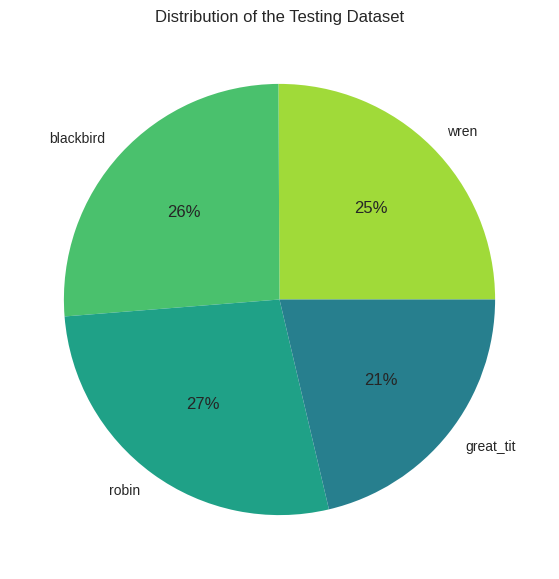

In [ ]:
createPieChartOfDistribution(y_test, ["wren", "blackbird", "robin", "great_tit"], "Distribution of the Testing Dataset")

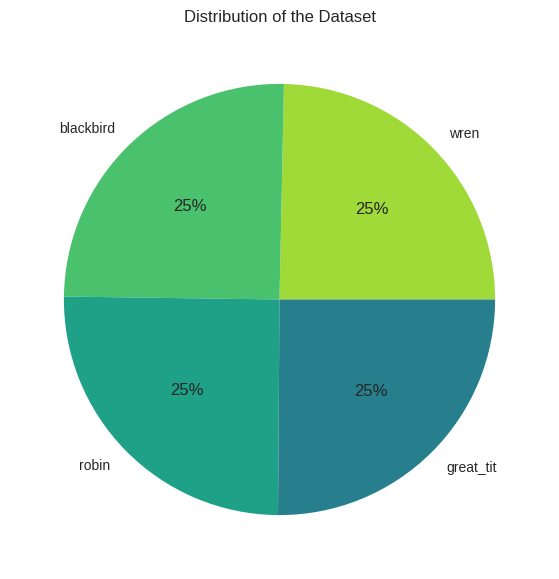

In [ ]:
createPieChartOfDistribution(y, ["wren", "blackbird", "robin", "great_tit"], "Distribution of the Dataset")

Creating the t-SNE plot:

In [ ]:
arr = []
for image in Data:
  arr.append(image.flatten())

arr = np.array(arr)
tsne = TSNE(n_components=2,random_state=0,perplexity=50.0,angle=0,n_iter=1000)
data_2d = tsne.fit_transform(arr)

In [ ]:
import plotly.express as px
fig = px.scatter(x=data_2d[:,0], y=data_2d[:,1], color=y, width=900, height=800, color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(
    title="t-SNE Visualization of Birdcall Dataset, (Wren=0, Blackbird=1, Robin=2, Great Tit=3)",
)
fig.update_layout(coloraxis={"colorbar":{"dtick":1}})
fig.show()

#Training

##Defining Values

In [ ]:
#for visualisations of architecture
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

In [ ]:
# Add callbacks to reduce the learning rate if needed, early stopping, and checkpoint saving
callbacks = EarlyStopping(monitor = 'val_loss', patience=10, restore_best_weights=True)

Model architecture search:

##Model Architecture Search

###Model 1

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(128,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.3))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 159, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 53, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_7 (Bat  (None, 16, 53, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/30
60/60 [==============================] - 3s 12ms/step - loss: 1.6294 - accuracy: 0.4019 - val_loss: 1.3571 - val_accuracy: 0.3925
Epoch 2/30
60/60 [==============================] - 0s 8ms/step - loss: 1.0617 - accuracy: 0.5604 - val_loss: 1.3902 - val_accuracy: 0.2512
Epoch 3/30
60/60 [==============================] - 0s 8ms/step - loss: 0.9160 - accuracy: 0.6264 - val_loss: 1.3216 - val_accuracy: 0.3783
Epoch 4/30
60/60 [==============================] - 0s 8ms/step - loss: 0.8176 - accuracy: 0.6735 - val_loss: 1.2498 - val_accuracy: 0.4270
Epoch 5/30
60/60 [==============================] - 0s 8ms/step - loss: 0.7383 - accuracy: 0.6986 - val_loss: 1.0140 - val_accuracy: 0.5683
Epoch 6/30
60/60 [==============================] - 0s 8ms/step - loss: 0.6670 - accuracy: 0.7336 - val_loss: 0.9151 - val_accuracy: 0.6107
Epoch 7/30
60/60 [==============================] - 0s 8ms/step - loss: 0.6147 - accuracy: 0.7478 - val_loss: 0.8230 - val_accuracy: 0.6499
Epoch 8/30
60/60 [=

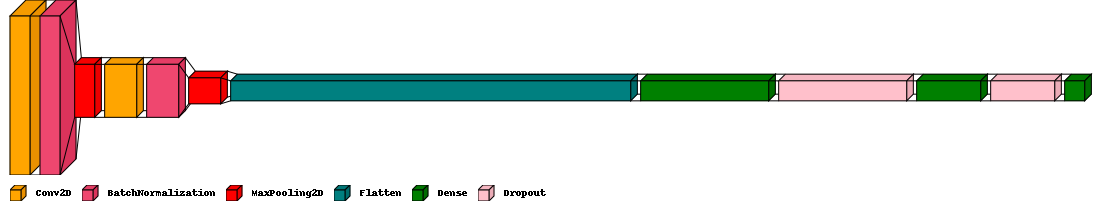

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       160
           1       0.93      0.92      0.93       167
           2       0.89      0.90      0.90       175
           3       0.81      0.80      0.80       136

    accuracy                           0.87       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.87      0.87      0.87       638



###Model 2

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(128,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.3))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 159, 64)       640       
                                                                 
 batch_normalization_12 (Ba  (None, 48, 159, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 53, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 53, 32)        18464     
                                                                 
 batch_normalization_13 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

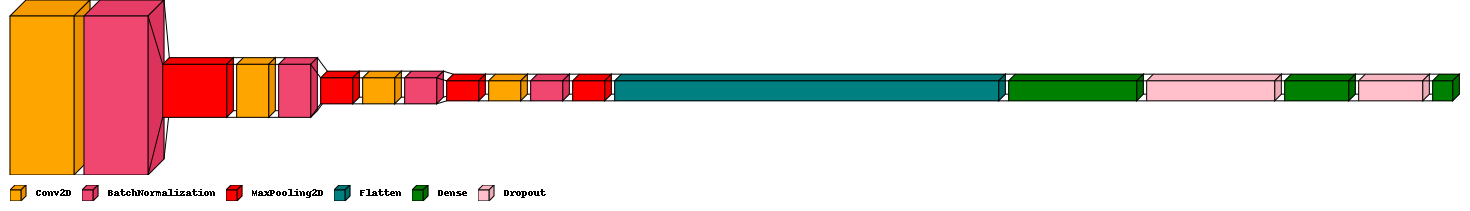

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/30
60/60 [==============================] - 4s 21ms/step - loss: 1.9543 - accuracy: 0.2894 - val_loss: 1.3894 - val_accuracy: 0.2323
Epoch 2/30
60/60 [==============================] - 1s 15ms/step - loss: 1.5093 - accuracy: 0.3679 - val_loss: 1.3907 - val_accuracy: 0.2245
Epoch 3/30
60/60 [==============================] - 1s 15ms/step - loss: 1.3265 - accuracy: 0.4312 - val_loss: 1.3808 - val_accuracy: 0.2575
Epoch 4/30
60/60 [==============================] - 1s 16ms/step - loss: 1.2270 - accuracy: 0.4746 - val_loss: 1.3550 - val_accuracy: 0.3469
Epoch 5/30
60/60 [==============================] - 1s 14ms/step - loss: 1.1295 - accuracy: 0.5128 - val_loss: 1.3186 - val_accuracy: 0.4160
Epoch 6/30
60/60 [==============================] - 1s 15ms/step - loss: 1.0544 - accuracy: 0.5447 - val_loss: 1.2752 - val_accuracy: 0.4301
Epoch 7/30
60/60 [==============================] - 1s 15ms/step - loss: 0.9783 - accuracy: 0.5882 - val_loss: 1.1762 - val_accuracy: 0.5290
Epoch 8/30
60

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       160
           1       0.91      0.98      0.94       167
           2       0.92      0.92      0.92       175
           3       0.88      0.79      0.83       136

    accuracy                           0.89       638
   macro avg       0.88      0.88      0.88       638
weighted avg       0.89      0.89      0.88       638



###Model 3

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(128,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.3))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_16 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_17 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

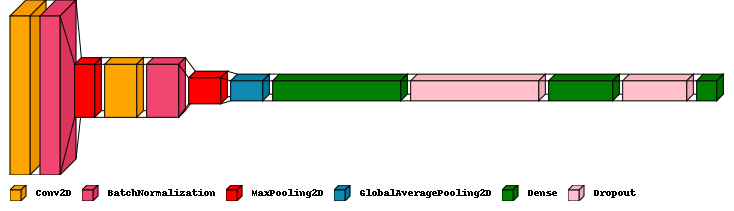

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=2000, legend=True, color_map = color_map)

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/30
60/60 [==============================] - 5s 16ms/step - loss: 1.4298 - accuracy: 0.2669 - val_loss: 1.3904 - val_accuracy: 0.2465
Epoch 2/30
60/60 [==============================] - 1s 11ms/step - loss: 1.3649 - accuracy: 0.3061 - val_loss: 1.3968 - val_accuracy: 0.2465
Epoch 3/30
60/60 [==============================] - 1s 9ms/step - loss: 1.3531 - accuracy: 0.3328 - val_loss: 1.4006 - val_accuracy: 0.2465
Epoch 4/30
60/60 [==============================] - 0s 7ms/step - loss: 1.3325 - accuracy: 0.3595 - val_loss: 1.3994 - val_accuracy: 0.2465
Epoch 5/30
60/60 [==============================] - 0s 7ms/step - loss: 1.3061 - accuracy: 0.3830 - val_loss: 1.3926 - val_accuracy: 0.2480
Epoch 6/30
60/60 [==============================] - 0s 7ms/step - loss: 1.2829 - accuracy: 0.4055 - val_loss: 1.3783 - val_accuracy: 0.2747
Epoch 7/30
60/60 [==============================] - 0s 7ms/step - loss: 1.2470 - accuracy: 0.4390 - val_loss: 1.3601 - val_accuracy: 0.3579
Epoch 8/30
60/60 [

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       160
           1       0.89      0.78      0.83       167
           2       0.77      0.90      0.83       175
           3       0.71      0.73      0.72       136

    accuracy                           0.78       638
   macro avg       0.78      0.78      0.78       638
weighted avg       0.79      0.78      0.78       638



###Model 4

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(128,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.3))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_18 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_19 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

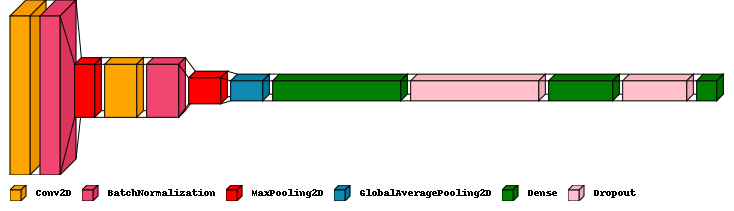

In [ ]:

visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=2000, legend=True, color_map = color_map)

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/30
60/60 [==============================] - 3s 12ms/step - loss: 1.4789 - accuracy: 0.2554 - val_loss: 1.3850 - val_accuracy: 0.2732
Epoch 2/30
60/60 [==============================] - 0s 7ms/step - loss: 1.4120 - accuracy: 0.2726 - val_loss: 1.3839 - val_accuracy: 0.2747
Epoch 3/30
60/60 [==============================] - 0s 7ms/step - loss: 1.3806 - accuracy: 0.3176 - val_loss: 1.3849 - val_accuracy: 0.2747
Epoch 4/30
60/60 [==============================] - 0s 7ms/step - loss: 1.3496 - accuracy: 0.3370 - val_loss: 1.3857 - val_accuracy: 0.2747
Epoch 5/30
60/60 [==============================] - 0s 7ms/step - loss: 1.3151 - accuracy: 0.3825 - val_loss: 1.3851 - val_accuracy: 0.2700
Epoch 6/30
60/60 [==============================] - 0s 7ms/step - loss: 1.2971 - accuracy: 0.3893 - val_loss: 1.3777 - val_accuracy: 0.2747
Epoch 7/30
60/60 [==============================] - 0s 7ms/step - loss: 1.2572 - accuracy: 0.4286 - val_loss: 1.3616 - val_accuracy: 0.2857
Epoch 8/30
60/60 [=

In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       160
           1       0.92      0.75      0.83       167
           2       0.75      0.93      0.83       175
           3       0.60      0.73      0.66       136

    accuracy                           0.75       638
   macro avg       0.76      0.75      0.75       638
weighted avg       0.77      0.75      0.75       638



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 8ms/step
0.7625139763555838
0.7489116200372364
0.7466407635169642


###Model 5

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_20 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 global_average_pooling2d_2  (None, 16)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])


history = CNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/30
60/60 [==============================] - 2s 10ms/step - loss: 1.4238 - accuracy: 0.2569 - val_loss: 1.3873 - val_accuracy: 0.2527
Epoch 2/30
60/60 [==============================] - 0s 7ms/step - loss: 1.4144 - accuracy: 0.2527 - val_loss: 1.3868 - val_accuracy: 0.2559
Epoch 3/30
60/60 [==============================] - 0s 7ms/step - loss: 1.4118 - accuracy: 0.2716 - val_loss: 1.3863 - val_accuracy: 0.3140
Epoch 4/30
60/60 [==============================] - 0s 6ms/step - loss: 1.4064 - accuracy: 0.2768 - val_loss: 1.3860 - val_accuracy: 0.3030
Epoch 5/30
60/60 [==============================] - 0s 7ms/step - loss: 1.4029 - accuracy: 0.2616 - val_loss: 1.3855 - val_accuracy: 0.2873
Epoch 6/30
60/60 [==============================] - 0s 6ms/step - loss: 1.3995 - accuracy: 0.2664 - val_loss: 1.3849 - val_accuracy: 0.2873
Epoch 7/30
60/60 [==============================] - 0s 6ms/step - loss: 1.3963 - accuracy: 0.2700 - val_loss: 1.3842 - val_accuracy: 0.2857
Epoch 8/30
60/60 [=

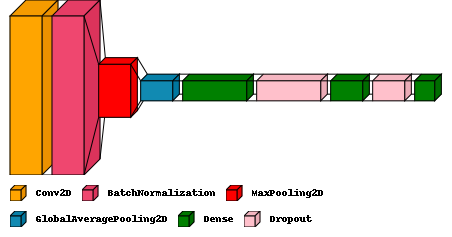

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=2, max_z=1000, legend=True, color_map = color_map)

In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.39      0.51      0.44       160
           1       0.16      0.11      0.13       167
           2       0.47      0.46      0.46       175
           3       0.29      0.30      0.30       136

    accuracy                           0.35       638
   macro avg       0.33      0.34      0.33       638
weighted avg       0.33      0.35      0.33       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.3259055065490511
0.3447244691289689
0.3321620684871325


###Model 6

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_29 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_30 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                     

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/50
192/192 [==============================] - 5s 12ms/step - loss: 1.2490 - accuracy: 0.4621 - val_loss: 1.5255 - val_accuracy: 0.2323
Epoch 2/50
192/192 [==============================] - 2s 9ms/step - loss: 1.0265 - accuracy: 0.5997 - val_loss: 1.4972 - val_accuracy: 0.3265
Epoch 3/50
192/192 [==============================] - 1s 7ms/step - loss: 0.8153 - accuracy: 0.6866 - val_loss: 1.5054 - val_accuracy: 0.5290
Epoch 4/50
192/192 [==============================] - 1s 6ms/step - loss: 0.7026 - accuracy: 0.7279 - val_loss: 1.5639 - val_accuracy: 0.3658
Epoch 5/50
192/192 [==============================] - 1s 6ms/step - loss: 0.6355 - accuracy: 0.7582 - val_loss: 0.6619 - val_accuracy: 0.7253
Epoch 6/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5943 - accuracy: 0.7745 - val_loss: 1.0622 - val_accuracy: 0.5761
Epoch 7/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5562 - accuracy: 0.7917 - val_loss: 1.2751 - val_accuracy: 0.5181
Epoch

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 3ms/step
0.8448453025243055
0.844980155235747
0.8443952225245609


In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       160
           1       0.90      0.84      0.87       167
           2       0.89      0.91      0.90       175
           3       0.76      0.81      0.78       136

    accuracy                           0.85       638
   macro avg       0.84      0.84      0.84       638
weighted avg       0.85      0.85      0.85       638



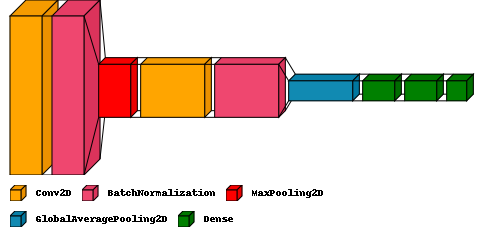

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=2, max_z=2000, legend=True, color_map = color_map)

###Model 7

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_23 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_24 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/50
192/192 [==============================] - 3s 6ms/step - loss: 0.8659 - accuracy: 0.6536 - val_loss: 2.2378 - val_accuracy: 0.4066
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5254 - accuracy: 0.8012 - val_loss: 1.2759 - val_accuracy: 0.5699
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 0.3461 - accuracy: 0.8660 - val_loss: 0.4741 - val_accuracy: 0.8352
Epoch 4/50
192/192 [==============================] - 1s 5ms/step - loss: 0.2369 - accuracy: 0.9063 - val_loss: 0.4546 - val_accuracy: 0.8509
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 0.1949 - accuracy: 0.9231 - val_loss: 0.4488 - val_accuracy: 0.8760
Epoch 6/50
192/192 [==============================] - 1s 5ms/step - loss: 0.1676 - accuracy: 0.9424 - val_loss: 0.5390 - val_accuracy: 0.8587
Epoch 7/50
192/192 [==============================] - 1s 5ms/step - loss: 0.1445 - accuracy: 0.9466 - val_loss: 0.7344 - val_accuracy: 0.8069
Epoch 

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.863992674252121
0.8603560421174458
0.8609141929558152


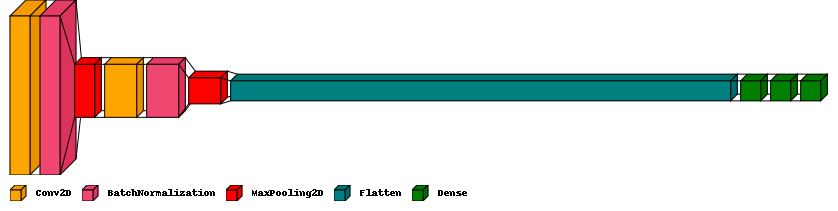

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=500, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       160
           1       0.86      0.96      0.90       167
           2       0.89      0.89      0.89       175
           3       0.85      0.78      0.81       136

    accuracy                           0.87       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.87      0.87      0.86       638



##Manual Hyperparameter Search

###Model 8

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_27 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_28 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                     

In [ ]:
callbacks = EarlyStopping(monitor = 'val_loss', patience=5, restore_best_weights=True)

CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/200
60/60 [==============================] - 3s 12ms/step - loss: 1.4348 - accuracy: 0.2967 - val_loss: 1.3840 - val_accuracy: 0.2747
Epoch 2/200
60/60 [==============================] - 0s 8ms/step - loss: 1.3155 - accuracy: 0.3830 - val_loss: 1.3811 - val_accuracy: 0.2779
Epoch 3/200
60/60 [==============================] - 0s 7ms/step - loss: 1.2495 - accuracy: 0.4359 - val_loss: 1.3823 - val_accuracy: 0.2747
Epoch 4/200
60/60 [==============================] - 0s 7ms/step - loss: 1.1630 - accuracy: 0.4788 - val_loss: 1.3806 - val_accuracy: 0.2779
Epoch 5/200
60/60 [==============================] - 0s 7ms/step - loss: 1.0852 - accuracy: 0.5568 - val_loss: 1.4022 - val_accuracy: 0.2747
Epoch 6/200
60/60 [==============================] - 0s 7ms/step - loss: 0.9801 - accuracy: 0.6023 - val_loss: 1.3817 - val_accuracy: 0.2747
Epoch 7/200
60/60 [==============================] - 1s 9ms/step - loss: 0.9060 - accuracy: 0.6415 - val_loss: 1.3055 - val_accuracy: 0.3203
Epoch 8/200


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.841078650210084
0.824376273713078
0.8254899673604299


###Model 9

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(24,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_31 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_32 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                     

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
120/120 [==============================] - 4s 13ms/step - loss: 1.4318 - accuracy: 0.2779 - val_loss: 1.3981 - val_accuracy: 0.2622
Epoch 2/100
120/120 [==============================] - 1s 6ms/step - loss: 1.3485 - accuracy: 0.3155 - val_loss: 1.4282 - val_accuracy: 0.2386
Epoch 3/100
120/120 [==============================] - 1s 6ms/step - loss: 1.3111 - accuracy: 0.3673 - val_loss: 1.4544 - val_accuracy: 0.2402
Epoch 4/100
120/120 [==============================] - 1s 8ms/step - loss: 1.2461 - accuracy: 0.4165 - val_loss: 1.3894 - val_accuracy: 0.2700
Epoch 5/100
120/120 [==============================] - 1s 9ms/step - loss: 1.1963 - accuracy: 0.4673 - val_loss: 1.2635 - val_accuracy: 0.3312
Epoch 6/100
120/120 [==============================] - 1s 9ms/step - loss: 1.1152 - accuracy: 0.5102 - val_loss: 1.1549 - val_accuracy: 0.5024
Epoch 7/100
120/120 [==============================] - 1s 8ms/step - loss: 1.0433 - accuracy: 0.5432 - val_loss: 1.0395 - val_accuracy: 0.584

In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       160
           1       0.94      0.84      0.89       167
           2       0.79      0.96      0.87       175
           3       0.92      0.72      0.81       136

    accuracy                           0.84       638
   macro avg       0.86      0.84      0.84       638
weighted avg       0.86      0.84      0.84       638



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.8585814462525965
0.8374749031349067
0.8419795632800563


###Model 10

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_33 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_34 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                     

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
120/120 [==============================] - 3s 8ms/step - loss: 1.3306 - accuracy: 0.3459 - val_loss: 1.4018 - val_accuracy: 0.2323
Epoch 2/100
120/120 [==============================] - 1s 6ms/step - loss: 1.2049 - accuracy: 0.4589 - val_loss: 1.4142 - val_accuracy: 0.2873
Epoch 3/100
120/120 [==============================] - 1s 6ms/step - loss: 1.0580 - accuracy: 0.5568 - val_loss: 1.4051 - val_accuracy: 0.3611
Epoch 4/100
120/120 [==============================] - 1s 6ms/step - loss: 0.9364 - accuracy: 0.6154 - val_loss: 1.2758 - val_accuracy: 0.4050
Epoch 5/100
120/120 [==============================] - 1s 6ms/step - loss: 0.8615 - accuracy: 0.6572 - val_loss: 0.9970 - val_accuracy: 0.6656
Epoch 6/100
120/120 [==============================] - 1s 6ms/step - loss: 0.7836 - accuracy: 0.6766 - val_loss: 0.9536 - val_accuracy: 0.5714
Epoch 7/100
120/120 [==============================] - 1s 6ms/step - loss: 0.7071 - accuracy: 0.7300 - val_loss: 0.7283 - val_accuracy: 0.7425

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 3ms/step
0.8492836140522165
0.842384249358426
0.8382478962982011


###Model 11

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_35 (Ba  (None, 48, 159, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 16, 53, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_36 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                     

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
120/120 [==============================] - 3s 11ms/step - loss: 1.4532 - accuracy: 0.2622 - val_loss: 1.3899 - val_accuracy: 0.2465
Epoch 2/100
120/120 [==============================] - 1s 7ms/step - loss: 1.3894 - accuracy: 0.2962 - val_loss: 1.3982 - val_accuracy: 0.2465
Epoch 3/100
120/120 [==============================] - 1s 6ms/step - loss: 1.3681 - accuracy: 0.3077 - val_loss: 1.3942 - val_accuracy: 0.2465
Epoch 4/100
120/120 [==============================] - 1s 7ms/step - loss: 1.3530 - accuracy: 0.3276 - val_loss: 1.3834 - val_accuracy: 0.3140
Epoch 5/100
120/120 [==============================] - 1s 6ms/step - loss: 1.3304 - accuracy: 0.3422 - val_loss: 1.3390 - val_accuracy: 0.3909
Epoch 6/100
120/120 [==============================] - 1s 6ms/step - loss: 1.3161 - accuracy: 0.3590 - val_loss: 1.2897 - val_accuracy: 0.4066
Epoch 7/100
120/120 [==============================] - 1s 6ms/step - loss: 1.3023 - accuracy: 0.3773 - val_loss: 1.2589 - val_accuracy: 0.412

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.7858938353393288
0.7675329907412066
0.7599926934087905


###Model 12

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(8,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_92 (Conv2D)                   │ (None, 48, 159, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_92               │ (None, 48, 159, 16)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_92 (MaxPooling2D)      │ (None, 16, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 16, 53, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 16, 53, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_93 (MaxPooling2D)      │ (None, 8, 26, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,692 (22.23 KB)

 Trainable params: 5,596 (21.86 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.2628 - loss: 1.5007 - val_accuracy: 0.2465 - val_loss: 1.3976
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3536 - loss: 1.3256 - val_accuracy: 0.2465 - val_loss: 1.4422
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3580 - loss: 1.3077 - val_accuracy: 0.2465 - val_loss: 1.4773
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3892 - loss: 1.2992 - val_accuracy: 0.2465 - val_loss: 1.5151
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3832 - loss: 1.2779 - val_accuracy: 0.2465 - val_loss: 1.4735
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4312 - loss: 1.2343 - val_accuracy: 0.2496 - val_loss: 1.4371
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4193 - loss: 1.2360 - val_accuracy: 0.2198 - val_loss: 1.3954
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4482 - loss: 1.2033 - val_accuracy: 0.3736 

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
0.8447312006837261
0.8461693315050571
0.8447623229263318


In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       160
           1       0.89      0.93      0.91       167
           2       0.90      0.90      0.90       175
           3       0.78      0.82      0.80       136

    accuracy                           0.85       638
   macro avg       0.84      0.85      0.84       638
weighted avg       0.85      0.85      0.85       638



##Grid Search

###Model Architecture 1

In [ ]:
def create_model():
  model = Sequential()
  model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(3))
  model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(2))
  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dense(16,activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(8,activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(4,activation='softmax'))
  model.compile(optimizer='adam',
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])
  return model


model = KerasClassifier(model=create_model, verbose=0)

batch_size = [10,30,50]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_test, y_test)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Best: 0.705500 using {'batch_size': 10, 'epochs': 100}
0.383920 (0.087390) with: {'batch_size': 10, 'epochs': 10}
0.619107 (0.091909) with: {'batch_size': 10, 'epochs': 50}
0.705500 (0.048225) with: {'batch_size': 10, 'epochs': 100}
0.291474 (0.037947) with: {'batch_size': 30, 'epochs': 10}
0.590859 (0.076484) with: {'batch_size': 30, 'epochs': 50}
0.692446 (0.104353) with: {'batch_size': 30, 'epochs': 100}
0.261774 (0.008530) with: {'batch_size': 50, 'epochs': 10}
0.457517 (0.111692) with: {'batch_size': 50, 'epochs': 50}
0.653396 (0.085475) with: {'batch_size': 50, 'epochs': 100}


In [ ]:
def create_model(dropout_rate, neurons):
  model = Sequential()
  model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(3))
  model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(2))
  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dense(neurons,activation='relu'))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(neurons,activation='relu'))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(4,activation='softmax'))
  model.compile(optimizer='adam',
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])
  return model


model = KerasClassifier(model=create_model, epochs=30, batch_size=10, verbose=0)

neurons=[4, 8, 32]
dropout_rate=[0.0, 0.7, 0.9]

param_grid = dict(model__dropout_rate=dropout_rate, model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_test, y_test)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Best: 0.789924 using {'model__dropout_rate': 0.0, 'model__neurons': 32}
0.600098 (0.067772) with: {'model__dropout_rate': 0.0, 'model__neurons': 4}
0.761651 (0.034906) with: {'model__dropout_rate': 0.0, 'model__neurons': 8}
0.789924 (0.027738) with: {'model__dropout_rate': 0.0, 'model__neurons': 32}
0.311885 (0.052025) with: {'model__dropout_rate': 0.7, 'model__neurons': 4}
0.338620 (0.043580) with: {'model__dropout_rate': 0.7, 'model__neurons': 8}
0.521863 (0.078162) with: {'model__dropout_rate': 0.7, 'model__neurons': 32}
0.275874 (0.003886) with: {'model__dropout_rate': 0.9, 'model__neurons': 4}
0.272736 (0.006163) with: {'model__dropout_rate': 0.9, 'model__neurons': 8}
0.274299 (0.001055) with: {'model__dropout_rate': 0.9, 'model__neurons': 32}


###Model Architecture 2

In [ ]:
def create_model():
  model = Sequential()
  model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(3))
  model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(16,activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(8,activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(4,activation='softmax'))
  model.compile(optimizer='adam',
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])
  return model


model = KerasClassifier(model=create_model, verbose=0)

batch_size = [10,30,50]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_test, y_test)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Best: 0.618935 using {'batch_size': 10, 'epochs': 100}
0.340121 (0.064607) with: {'batch_size': 10, 'epochs': 10}
0.434560 (0.147811) with: {'batch_size': 10, 'epochs': 50}
0.618935 (0.099904) with: {'batch_size': 10, 'epochs': 100}
0.260113 (0.034610) with: {'batch_size': 30, 'epochs': 10}
0.615896 (0.098708) with: {'batch_size': 30, 'epochs': 50}
0.427707 (0.143107) with: {'batch_size': 30, 'epochs': 100}
0.268000 (0.008293) with: {'batch_size': 50, 'epochs': 10}
0.542421 (0.050684) with: {'batch_size': 50, 'epochs': 50}
0.589542 (0.180631) with: {'batch_size': 50, 'epochs': 100}


In [ ]:
def create_model(dropout_rate, neurons):
  model = Sequential()
  model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(3))
  model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(neurons,activation='relu'))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(neurons,activation='relu'))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(4,activation='softmax'))
  model.compile(optimizer='adam',
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])
  return model


model = KerasClassifier(model=create_model, epochs=30, batch_size=10, verbose=0)

neurons=[4, 8, 32]
dropout_rate=[0.0, 0.7, 0.9]

param_grid = dict(model__dropout_rate=dropout_rate, model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_test, y_test)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Best: 0.793036 using {'model__dropout_rate': 0.0, 'model__neurons': 32}
0.656533 (0.057509) with: {'model__dropout_rate': 0.0, 'model__neurons': 4}
0.716154 (0.056092) with: {'model__dropout_rate': 0.0, 'model__neurons': 8}
0.793036 (0.045035) with: {'model__dropout_rate': 0.0, 'model__neurons': 32}
0.274299 (0.005090) with: {'model__dropout_rate': 0.7, 'model__neurons': 4}
0.272736 (0.003684) with: {'model__dropout_rate': 0.7, 'model__neurons': 8}
0.272736 (0.003684) with: {'model__dropout_rate': 0.7, 'model__neurons': 32}
0.271161 (0.003808) with: {'model__dropout_rate': 0.9, 'model__neurons': 4}
0.272736 (0.003684) with: {'model__dropout_rate': 0.9, 'model__neurons': 8}
0.275874 (0.003886) with: {'model__dropout_rate': 0.9, 'model__neurons': 32}


##Testing the Two Best Models (using the gridsearch batch_size and epochs)

###Model 13 (Pooling)

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_4 (Bat  (None, 48, 159, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 53, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_5 (Bat  (None, 16, 53, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/50
192/192 [==============================] - 4s 8ms/step - loss: 1.2975 - accuracy: 0.3909 - val_loss: 1.3882 - val_accuracy: 0.2794
Epoch 2/50
192/192 [==============================] - 1s 6ms/step - loss: 1.0678 - accuracy: 0.5709 - val_loss: 1.3399 - val_accuracy: 0.2732
Epoch 3/50
192/192 [==============================] - 1s 7ms/step - loss: 0.8118 - accuracy: 0.6808 - val_loss: 1.2660 - val_accuracy: 0.3250
Epoch 4/50
192/192 [==============================] - 2s 8ms/step - loss: 0.6438 - accuracy: 0.7488 - val_loss: 0.7542 - val_accuracy: 0.6625
Epoch 5/50
192/192 [==============================] - 2s 8ms/step - loss: 0.5585 - accuracy: 0.7891 - val_loss: 0.7673 - val_accuracy: 0.7002
Epoch 6/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5101 - accuracy: 0.8158 - val_loss: 0.4656 - val_accuracy: 0.8273
Epoch 7/50
192/192 [==============================] - 1s 6ms/step - loss: 0.4540 - accuracy: 0.8252 - val_loss: 0.9810 - val_accuracy: 0.6075
Epoch 

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.8540699447536338
0.8472409173250138
0.8484549932825796


In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       160
           1       0.79      0.93      0.86       167
           2       0.93      0.89      0.91       175
           3       0.86      0.79      0.83       136

    accuracy                           0.85       638
   macro avg       0.85      0.85      0.85       638
weighted avg       0.85      0.85      0.85       638



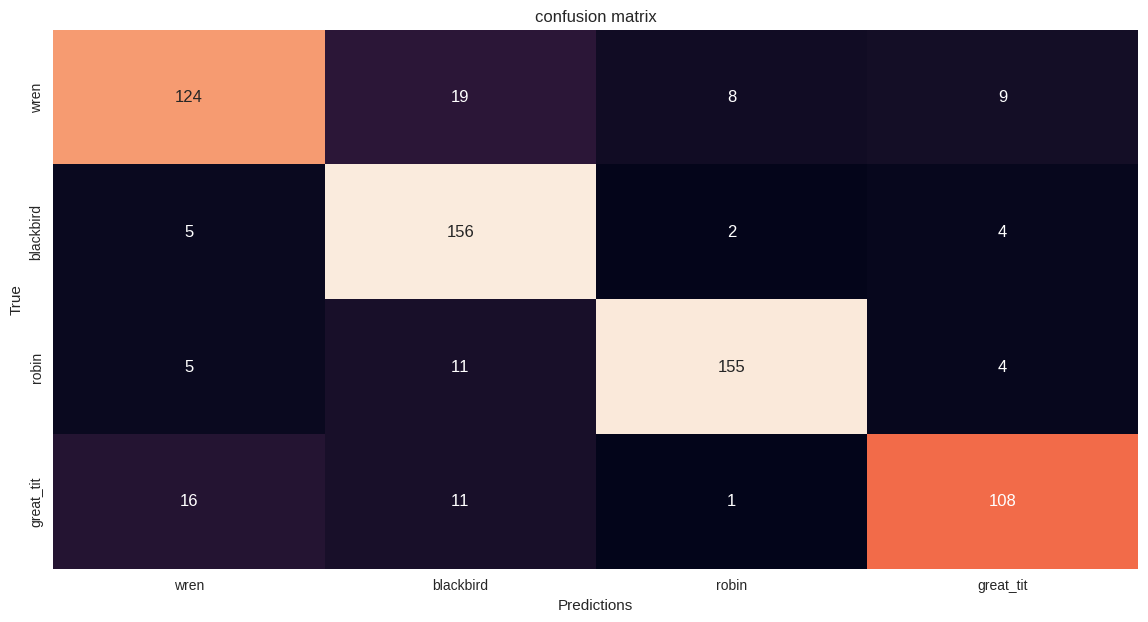

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

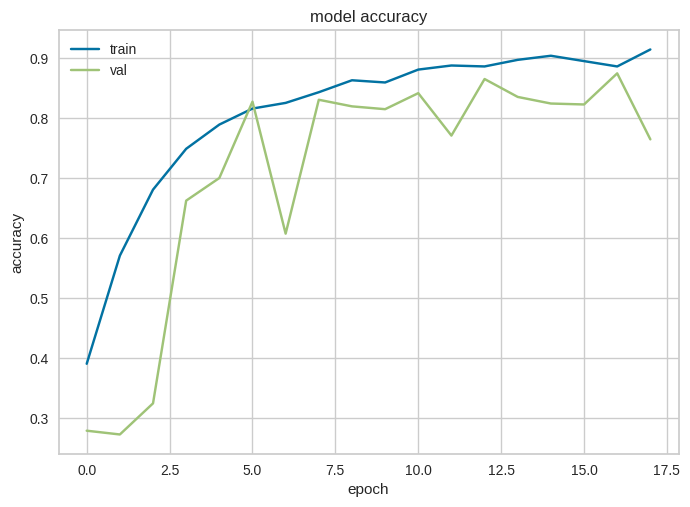

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

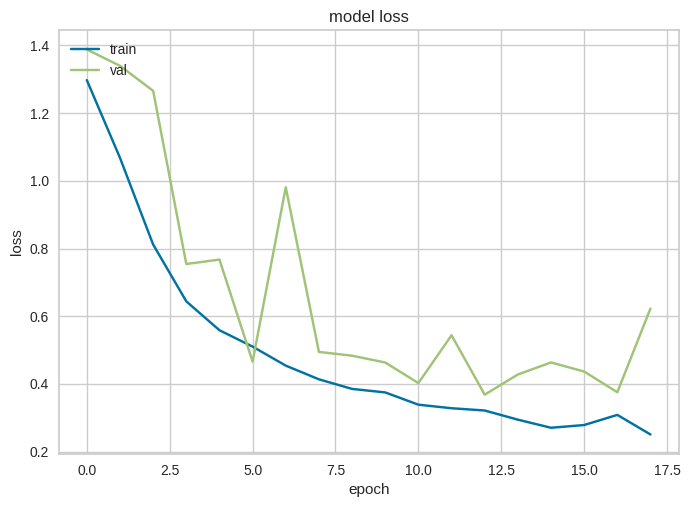

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

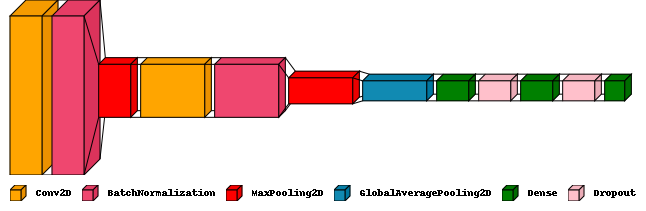

In [ ]:
visualkeras.layered_view(CNN_model, scale_xy=1, scale_z=2, max_z=2000, legend=True, color_map = color_map)

In [ ]:
CNN_model.save('Model_13.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Model 13 (Pooling)

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_2 (Bat  (None, 48, 159, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 53, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_3 (Bat  (None, 16, 53, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 [==============================] - 11s 9ms/step - loss: 1.3106 - accuracy: 0.3537 - val_loss: 1.3869 - val_accuracy: 0.2480
Epoch 2/100
192/192 [==============================] - 1s 6ms/step - loss: 1.1508 - accuracy: 0.4809 - val_loss: 1.3118 - val_accuracy: 0.2967
Epoch 3/100
192/192 [==============================] - 1s 6ms/step - loss: 1.0080 - accuracy: 0.5824 - val_loss: 1.2506 - val_accuracy: 0.3658
Epoch 4/100
192/192 [==============================] - 1s 6ms/step - loss: 0.8960 - accuracy: 0.6431 - val_loss: 0.8048 - val_accuracy: 0.7221
Epoch 5/100
192/192 [==============================] - 1s 6ms/step - loss: 0.8255 - accuracy: 0.6803 - val_loss: 1.4417 - val_accuracy: 0.3956
Epoch 6/100
192/192 [==============================] - 1s 6ms/step - loss: 0.7428 - accuracy: 0.7127 - val_loss: 0.7732 - val_accuracy: 0.6750
Epoch 7/100
192/192 [==============================] - 1s 7ms/step - loss: 0.7082 - accuracy: 0.7195 - val_loss: 0.8196 - val_accuracy: 0.656

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 8ms/step
0.8247720745316599
0.8175482281235847
0.81762777196012


In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       160
           1       0.90      0.74      0.81       167
           2       0.80      0.94      0.87       175
           3       0.80      0.77      0.79       136

    accuracy                           0.82       638
   macro avg       0.82      0.82      0.82       638
weighted avg       0.83      0.82      0.82       638



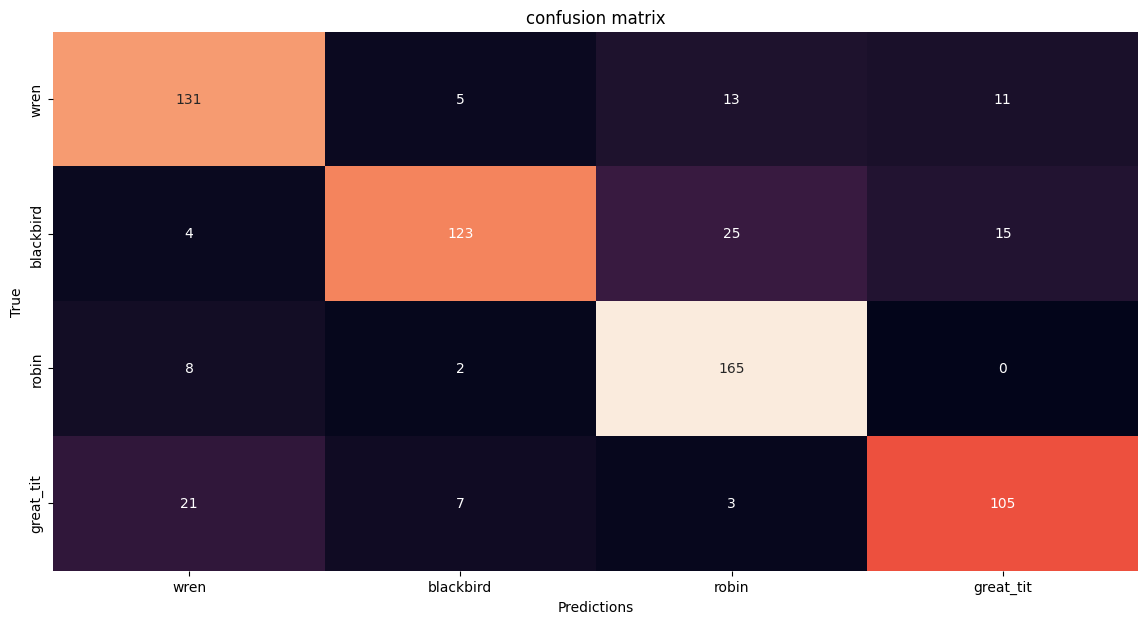

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

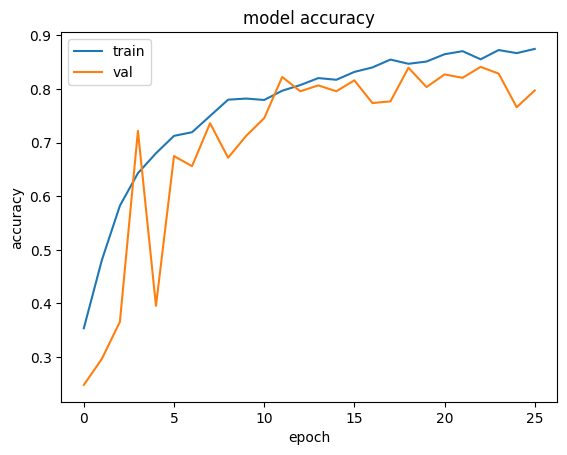

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

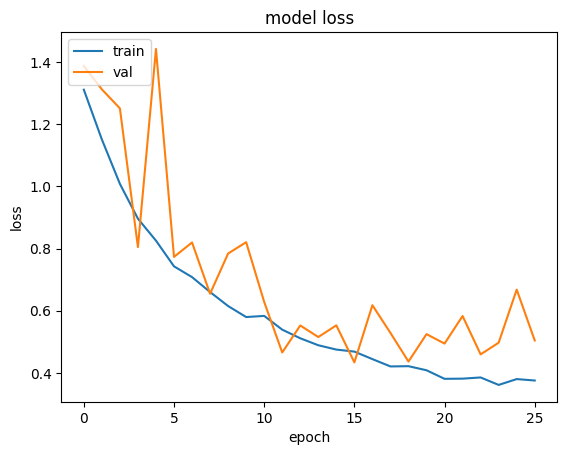

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

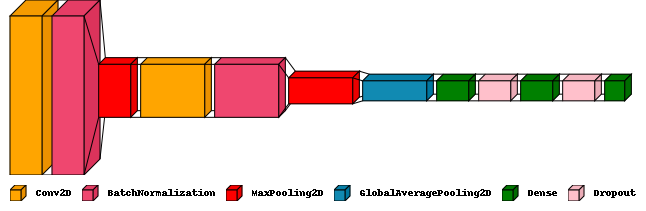

In [ ]:
visualkeras.layered_view(CNN_model, scale_xy=1, scale_z=2, max_z=2000, legend=True, color_map = color_map)

###Model 13 (Pooling)

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dense(16,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_4 (Bat  (None, 48, 159, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 53, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_5 (Bat  (None, 16, 53, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/50
192/192 [==============================] - 4s 8ms/step - loss: 1.2975 - accuracy: 0.3909 - val_loss: 1.3882 - val_accuracy: 0.2794
Epoch 2/50
192/192 [==============================] - 1s 6ms/step - loss: 1.0678 - accuracy: 0.5709 - val_loss: 1.3399 - val_accuracy: 0.2732
Epoch 3/50
192/192 [==============================] - 1s 7ms/step - loss: 0.8118 - accuracy: 0.6808 - val_loss: 1.2660 - val_accuracy: 0.3250
Epoch 4/50
192/192 [==============================] - 2s 8ms/step - loss: 0.6438 - accuracy: 0.7488 - val_loss: 0.7542 - val_accuracy: 0.6625
Epoch 5/50
192/192 [==============================] - 2s 8ms/step - loss: 0.5585 - accuracy: 0.7891 - val_loss: 0.7673 - val_accuracy: 0.7002
Epoch 6/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5101 - accuracy: 0.8158 - val_loss: 0.4656 - val_accuracy: 0.8273
Epoch 7/50
192/192 [==============================] - 1s 6ms/step - loss: 0.4540 - accuracy: 0.8252 - val_loss: 0.9810 - val_accuracy: 0.6075
Epoch 

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.8540699447536338
0.8472409173250138
0.8484549932825796


In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       160
           1       0.79      0.93      0.86       167
           2       0.93      0.89      0.91       175
           3       0.86      0.79      0.83       136

    accuracy                           0.85       638
   macro avg       0.85      0.85      0.85       638
weighted avg       0.85      0.85      0.85       638



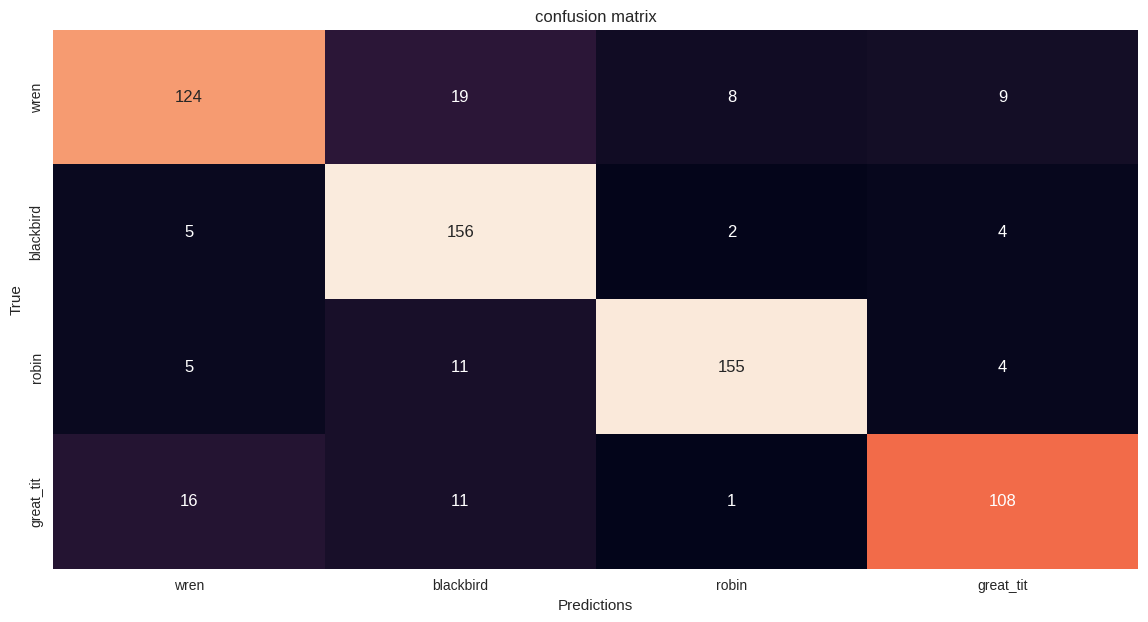

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

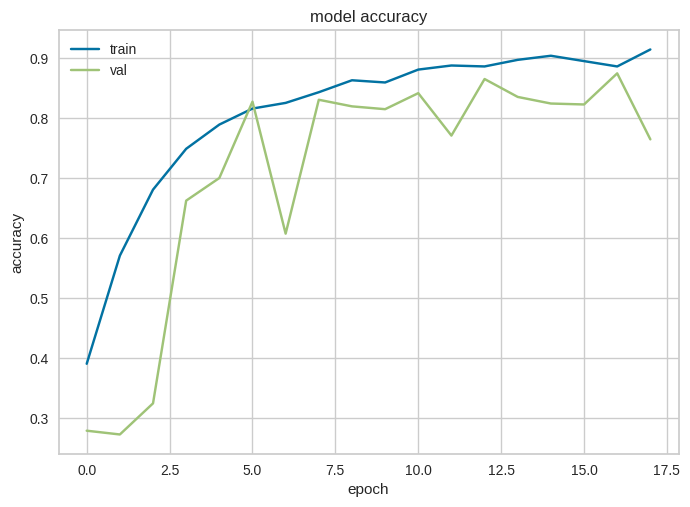

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

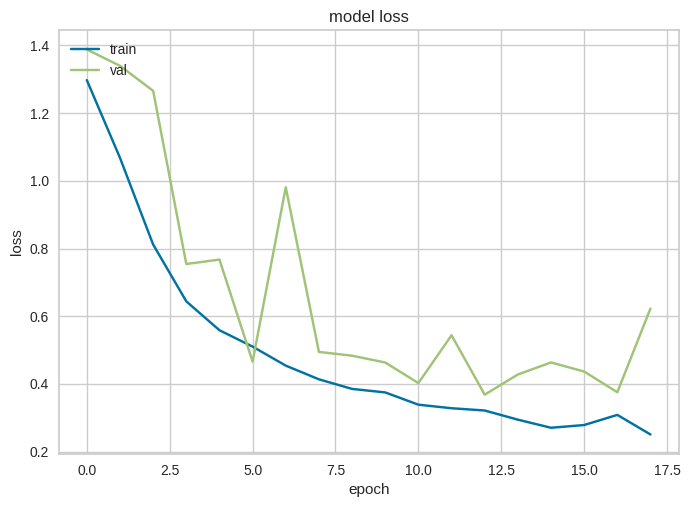

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('Model_13.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Model 14 (Flatten) comparison for architecture

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_2 (Bat  (None, 48, 159, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 53, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_3 (Bat  (None, 16, 53, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
39/39 [==============================] - 7s 33ms/step - loss: 1.0447 - accuracy: 0.5484 - val_loss: 1.3594 - val_accuracy: 0.3359
Epoch 2/100
39/39 [==============================] - 0s 10ms/step - loss: 0.6670 - accuracy: 0.7295 - val_loss: 1.3585 - val_accuracy: 0.2418
Epoch 3/100
39/39 [==============================] - 1s 14ms/step - loss: 0.5024 - accuracy: 0.8226 - val_loss: 1.3497 - val_accuracy: 0.2653
Epoch 4/100
39/39 [==============================] - 1s 14ms/step - loss: 0.3867 - accuracy: 0.8739 - val_loss: 1.3438 - val_accuracy: 0.2889
Epoch 5/100
39/39 [==============================] - 0s 12ms/step - loss: 0.3068 - accuracy: 0.9074 - val_loss: 1.3322 - val_accuracy: 0.3736
Epoch 6/100
39/39 [==============================] - 0s 11ms/step - loss: 0.2441 - accuracy: 0.9299 - val_loss: 1.3009 - val_accuracy: 0.3642
Epoch 7/100
39/39 [==============================] - 0s 11ms/step - loss: 0.1972 - accuracy: 0.9498 - val_loss: 1.2561 - val_accuracy: 0.3815
Epoch 

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       160
           1       0.93      0.90      0.92       167
           2       0.87      0.94      0.90       175
           3       0.77      0.81      0.79       136

    accuracy                           0.86       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.86      0.86      0.86       638



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 7ms/step
0.8574109835685034
0.8562895008302722
0.8558784230927925


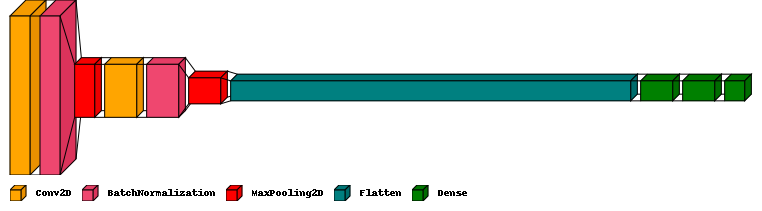

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

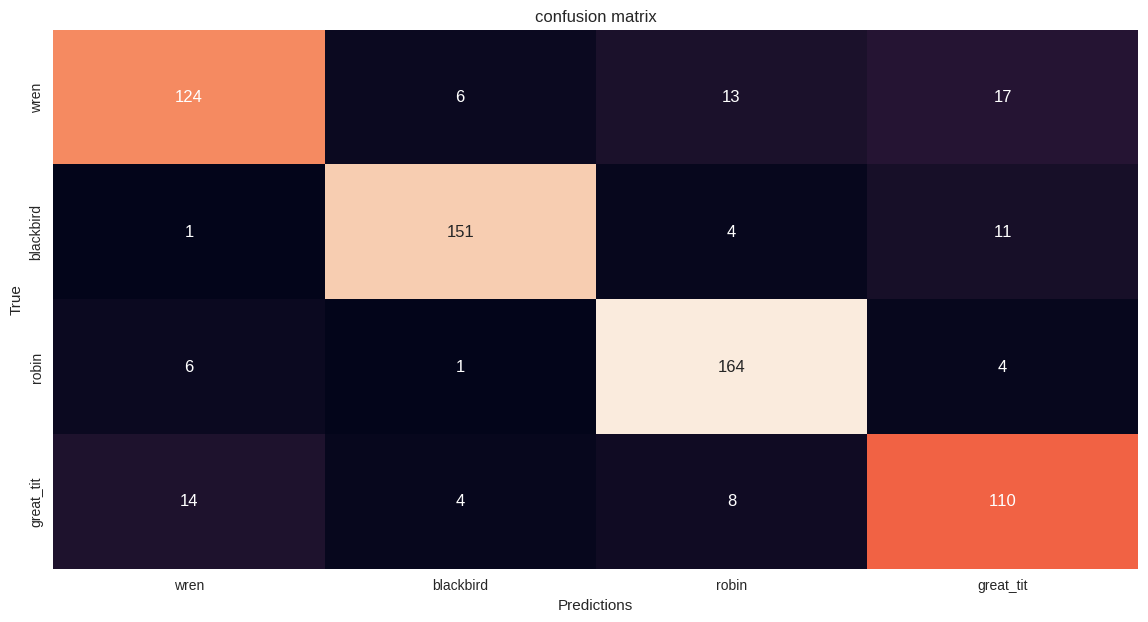

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(["wren", "blackbird", "robin", "great_tit"]);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

###Model 14 (Flatten) comparison for architecture

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 159, 16)       160       
                                                                 
 batch_normalization_4 (Bat  (None, 48, 159, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 53, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 53, 32)        4640      
                                                                 
 batch_normalization_5 (Bat  (None, 16, 53, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
39/39 [==============================] - 7s 35ms/step - loss: 1.3636 - accuracy: 0.3590 - val_loss: 1.3705 - val_accuracy: 0.3878
Epoch 2/100
39/39 [==============================] - 1s 13ms/step - loss: 1.0294 - accuracy: 0.5573 - val_loss: 1.3561 - val_accuracy: 0.3516
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.8790 - accuracy: 0.6149 - val_loss: 1.3345 - val_accuracy: 0.3281
Epoch 4/100
39/39 [==============================] - 1s 16ms/step - loss: 0.8156 - accuracy: 0.6625 - val_loss: 1.3390 - val_accuracy: 0.3579
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.7143 - accuracy: 0.7169 - val_loss: 1.3864 - val_accuracy: 0.3344
Epoch 6/100
39/39 [==============================] - 1s 17ms/step - loss: 0.6715 - accuracy: 0.7467 - val_loss: 1.3765 - val_accuracy: 0.3485
Epoch 7/100
39/39 [==============================] - 0s 12ms/step - loss: 0.5881 - accuracy: 0.7792 - val_loss: 1.2809 - val_accuracy: 0.3987
Epoch 

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       160
           1       0.92      0.94      0.93       167
           2       0.90      0.89      0.90       175
           3       0.80      0.75      0.77       136

    accuracy                           0.87       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.87      0.87      0.87       638



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.8620157650554556
0.8610120829769033
0.8612247116441516


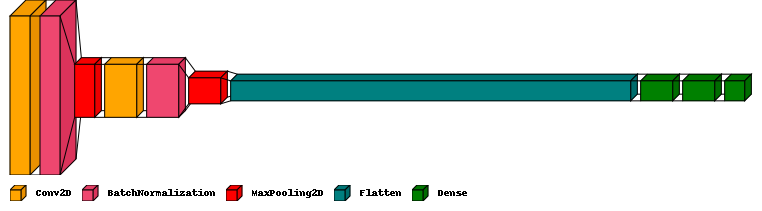

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

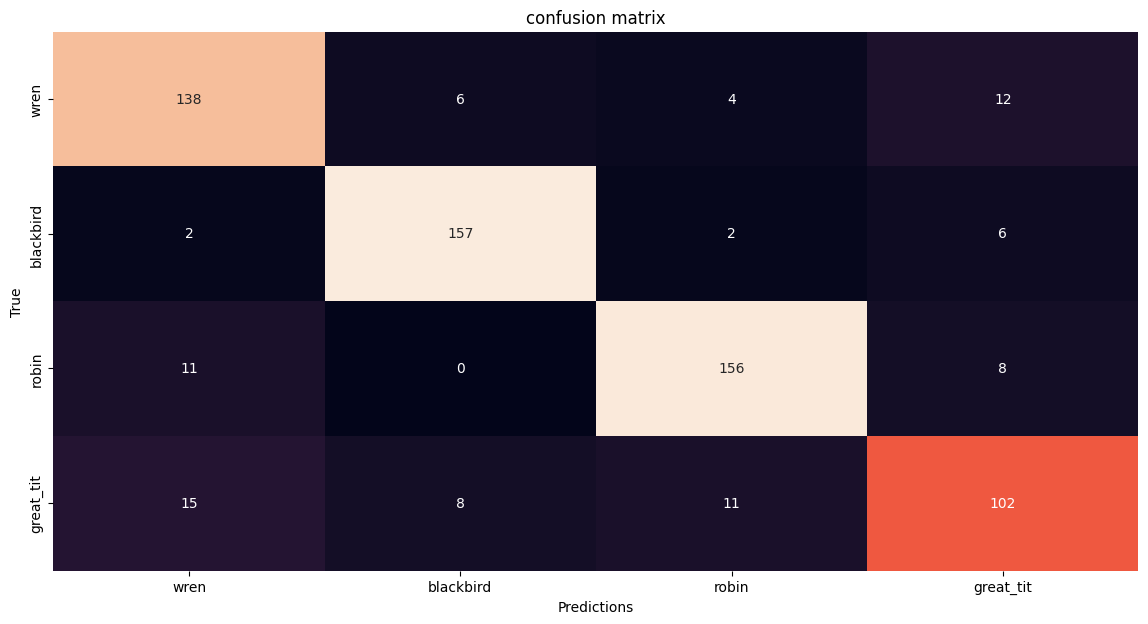

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(["wren", "blackbird", "robin", "great_tit"]);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

In [ ]:
CNN_model.save('Model_14.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Using All Recommended Hyperparameters

###Model 13 (Pooling)

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_186 (Conv2D)                  │ (None, 48, 159, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_186              │ (None, 48, 159, 16)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_186 (MaxPooling2D)     │ (None, 16, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_187 (Conv2D)                  │ (None, 16, 53, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_187              │ (None, 16, 53, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_187 (MaxPooling2D)     │ (None, 8, 26, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_47          │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_279 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_280 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_281 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,236 (28.27 KB)

 Trainable params: 7,140 (27.89 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3723 - loss: 1.2914 - val_accuracy: 0.2323 - val_loss: 1.4777
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5643 - loss: 1.0480 - val_accuracy: 0.2606 - val_loss: 1.3805
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6543 - loss: 0.8779 - val_accuracy: 0.5479 - val_loss: 1.0602
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7347 - loss: 0.6881 - val_accuracy: 0.6170 - val_loss: 0.9387
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7775 - loss: 0.6040 - val_accuracy: 0.7504 - val_loss: 0.6166
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7838 - loss: 0.5234 - val_accuracy: 0.6939 - val_loss: 0.7995
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8175 - loss: 0.4846 - val_accuracy: 0.8163 - val_loss: 0.4980
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8344 - loss: 0.4451 - val_acc

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
0.871604830061046
0.8714585115483319
0.8699833632694515


In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       160
           1       0.89      0.94      0.92       167
           2       0.97      0.85      0.91       175
           3       0.82      0.88      0.85       136

    accuracy                           0.87       638
   macro avg       0.87      0.87      0.87       638
weighted avg       0.88      0.87      0.87       638



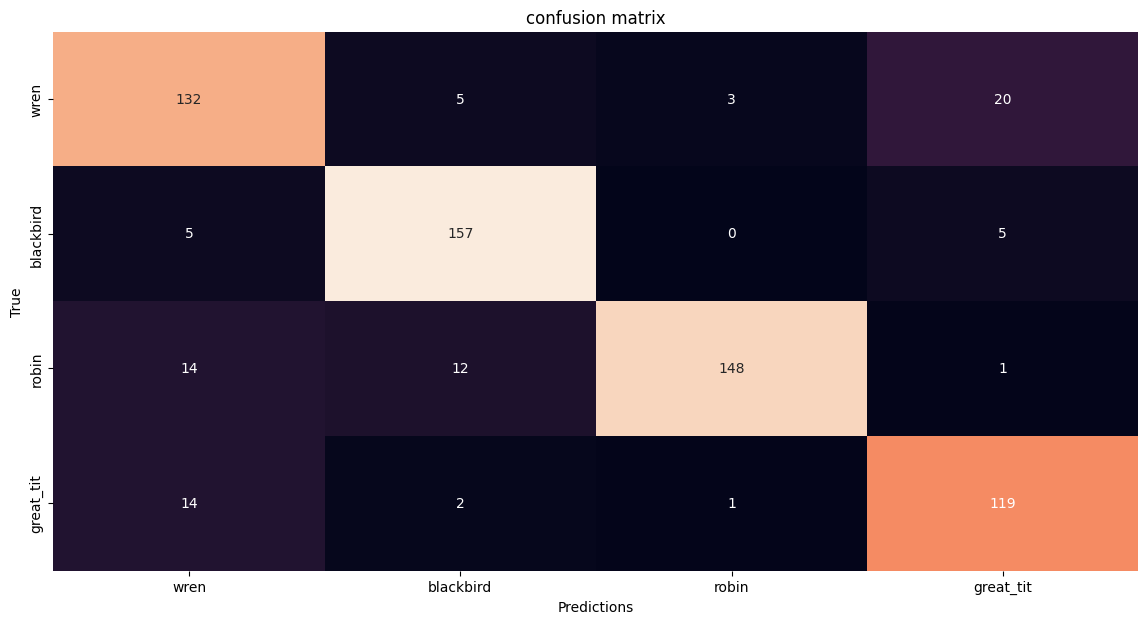

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

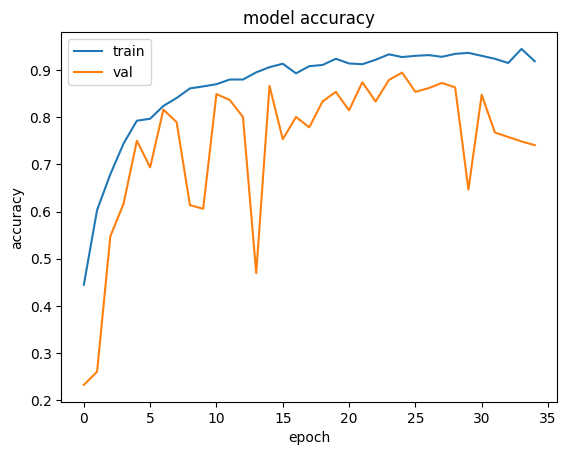

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

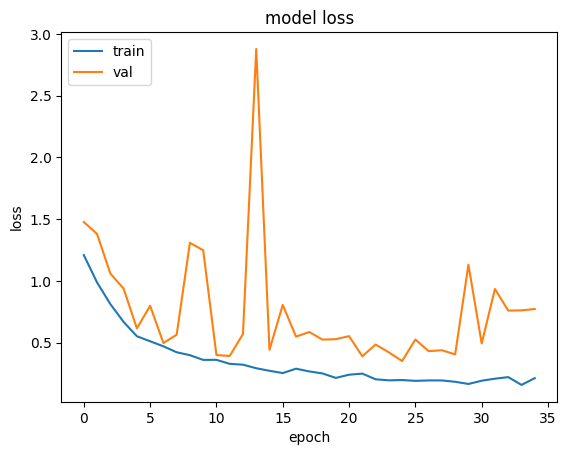

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('Model_13_2.h5')

###Model 13 (Pooling)

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_188 (Conv2D)                  │ (None, 48, 159, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_188              │ (None, 48, 159, 16)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_188 (MaxPooling2D)     │ (None, 16, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_189 (Conv2D)                  │ (None, 16, 53, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_189              │ (None, 16, 53, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_189 (MaxPooling2D)     │ (None, 8, 26, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_48          │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_282 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_283 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_284 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,236 (28.27 KB)

 Trainable params: 7,140 (27.89 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val))

Epoch 1/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3533 - loss: 1.3257 - val_accuracy: 0.2747 - val_loss: 1.3859
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5680 - loss: 1.0282 - val_accuracy: 0.2998 - val_loss: 1.3704
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6916 - loss: 0.7866 - val_accuracy: 0.5447 - val_loss: 1.0278
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7593 - loss: 0.6564 - val_accuracy: 0.7064 - val_loss: 0.7115
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7927 - loss: 0.5395 - val_accuracy: 0.5918 - val_loss: 0.9667
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8123 - loss: 0.5043 - val_accuracy: 0.7394 - val_loss: 0.6839
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8222 - loss: 0.4818 - val_accuracy: 0.8619 - val_loss: 0.4206
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.3908 - val_acc

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
0.9353023884491529
0.932242175313239
0.9333338005827154


In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       160
           1       0.95      0.98      0.96       167
           2       0.95      0.95      0.95       175
           3       0.94      0.87      0.90       136

    accuracy                           0.94       638
   macro avg       0.94      0.93      0.93       638
weighted avg       0.94      0.94      0.94       638



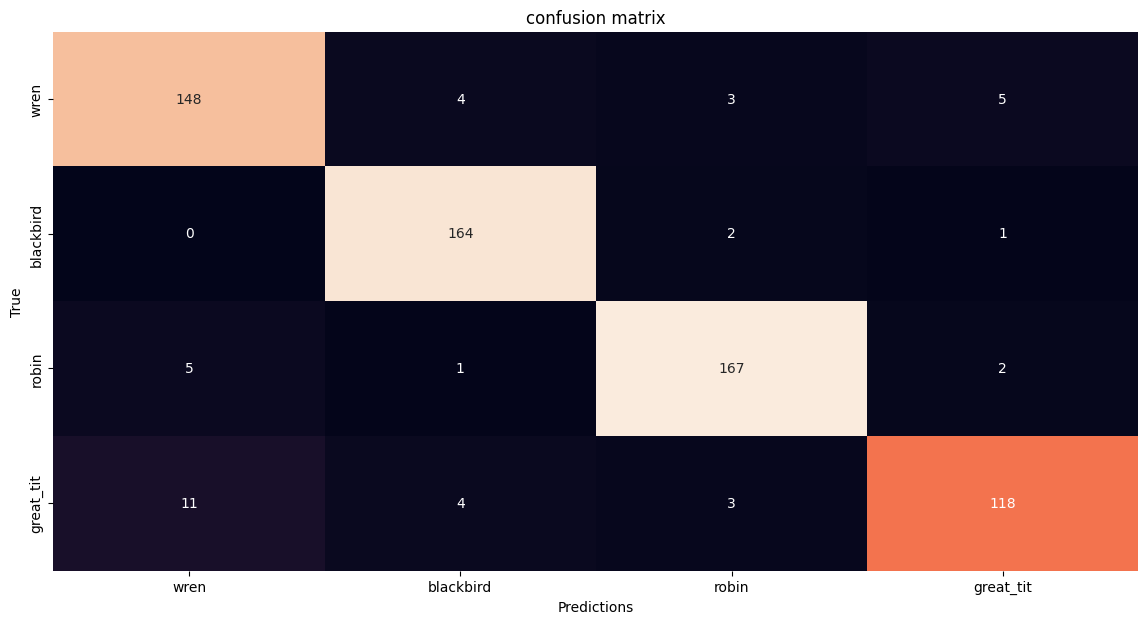

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

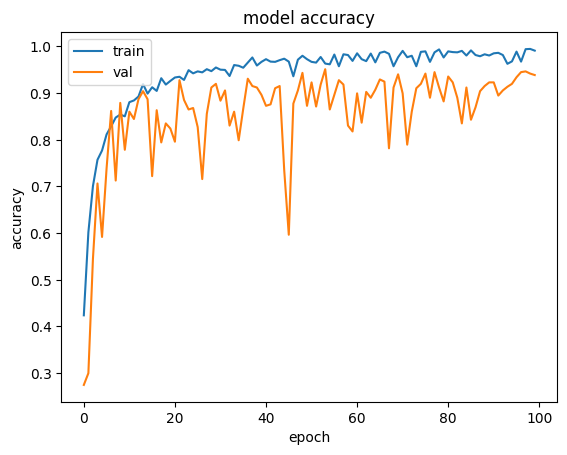

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

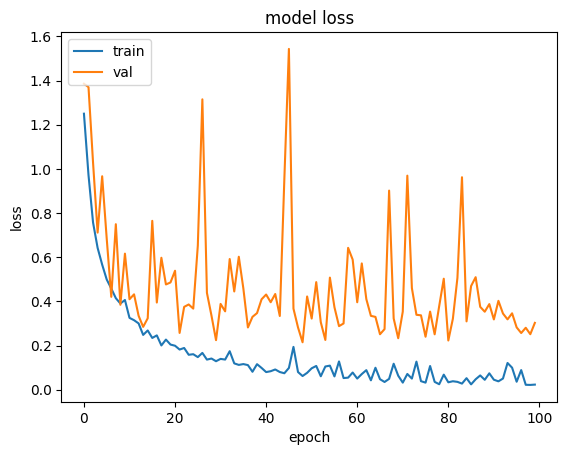

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('Model_13_overfit.h5')

###Model 13 (Pooling)

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(16,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 159, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 159, 16)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 53, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 53, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 26, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 26, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,364 (28.77 KB)

 Trainable params: 7,204 (28.14 KB)

 Non-trainable params: 160 (640.00 B)

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.3875 - loss: 1.3203 - val_accuracy: 0.2716 - val_loss: 1.5171
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5870 - loss: 1.0090 - val_accuracy: 0.3297 - val_loss: 1.5232
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6886 - loss: 0.7916 - val_accuracy: 0.4929 - val_loss: 1.1295
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7607 - loss: 0.6350 - val_accuracy: 0.8069 - val_loss: 0.5340
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8005 - loss: 0.5569 - val_accuracy: 0.7975 - val_loss: 0.5843
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8026 - loss: 0.5264 - val_accuracy: 0.7912 - val_loss: 0.5150
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8190 - loss: 0.4519 - val_accuracy: 0.6170 - val_loss: 0.9830
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8495 - loss: 0.4129 - val_ac

In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step
0.8496092936656661
0.847273955240779
0.8476646326429751


In [ ]:
y_pred = CNN_model.predict(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       160
           1       0.85      0.89      0.87       167
           2       0.94      0.87      0.90       175
           3       0.81      0.77      0.79       136

    accuracy                           0.85       638
   macro avg       0.85      0.85      0.85       638
weighted avg       0.85      0.85      0.85       638



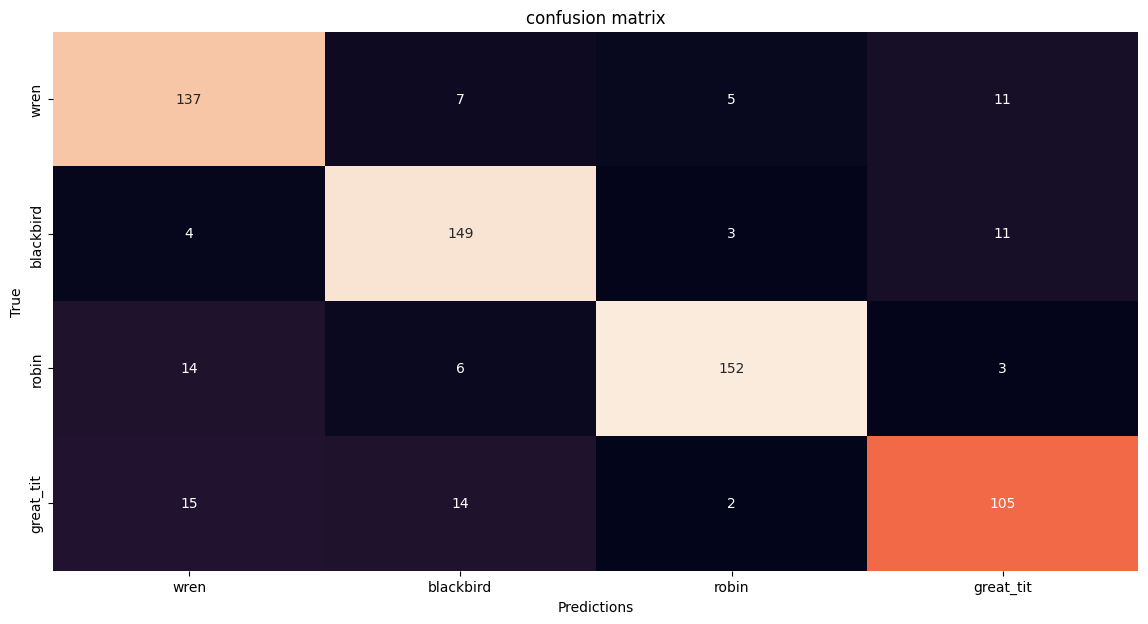

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

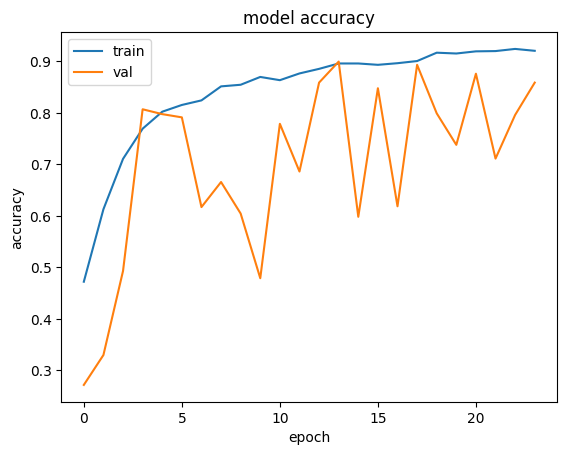

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

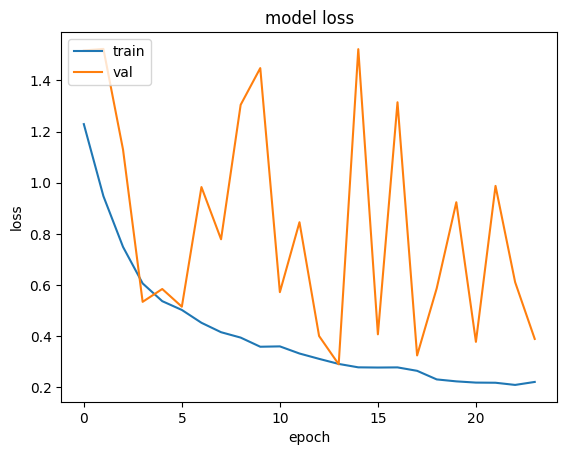

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('Model_13_2_.h5')

##Larger Architecture

###Increase Flatten

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(128,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.5))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 159, 64)       640       
                                                                 
 batch_normalization (Batch  (None, 48, 159, 64)       256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 53, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 53, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 53, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/30
60/60 [==============================] - 10s 29ms/step - loss: 1.5786 - accuracy: 0.4223 - val_loss: 1.5489 - val_accuracy: 0.2465
Epoch 2/30
60/60 [==============================] - 1s 11ms/step - loss: 1.1014 - accuracy: 0.5003 - val_loss: 1.7976 - val_accuracy: 0.2747
Epoch 3/30
60/60 [==============================] - 1s 11ms/step - loss: 0.9686 - accuracy: 0.5772 - val_loss: 1.6440 - val_accuracy: 0.2747
Epoch 4/30
60/60 [==============================] - 1s 10ms/step - loss: 0.8571 - accuracy: 0.6290 - val_loss: 1.5354 - val_accuracy: 0.2716
Epoch 5/30
60/60 [==============================] - 1s 10ms/step - loss: 0.8058 - accuracy: 0.6761 - val_loss: 1.2772 - val_accuracy: 0.3265
Epoch 6/30
60/60 [==============================] - 1s 11ms/step - loss: 0.7462 - accuracy: 0.6855 - val_loss: 1.0320 - val_accuracy: 0.5981
Epoch 7/30
60/60 [==============================] - 1s 9ms/step - loss: 0.6981 - accuracy: 0.7206 - val_loss: 1.0712 - val_accuracy: 0.5353
Epoch 8/30
60

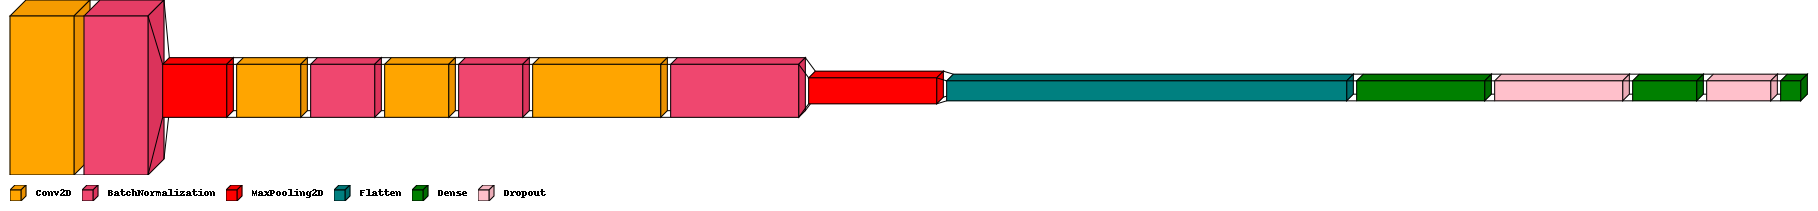

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       160
           1       0.94      0.95      0.94       167
           2       0.93      0.92      0.93       175
           3       0.85      0.85      0.85       136

    accuracy                           0.90       638
   macro avg       0.90      0.90      0.90       638
weighted avg       0.90      0.90      0.90       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 12ms/step
0.8982068392734082
0.8985122402254315
0.8983469470570603


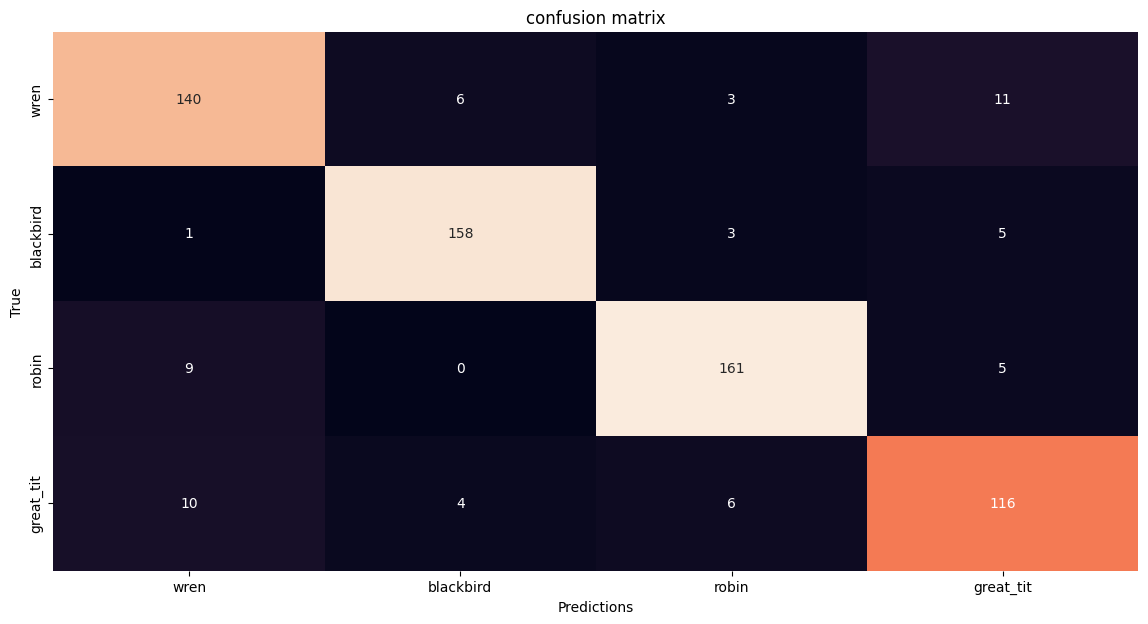

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

In [ ]:
CNN_model.save('model_best_flatten.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


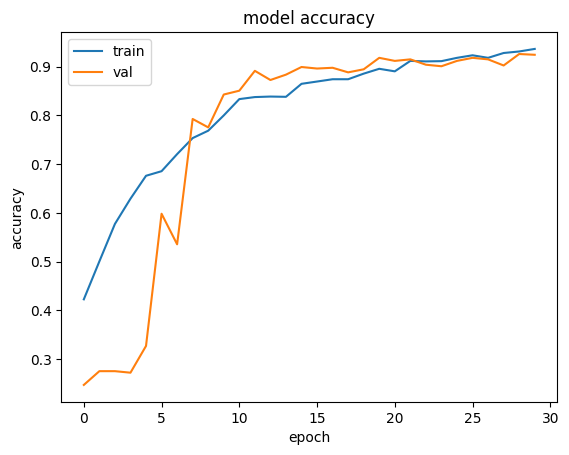

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

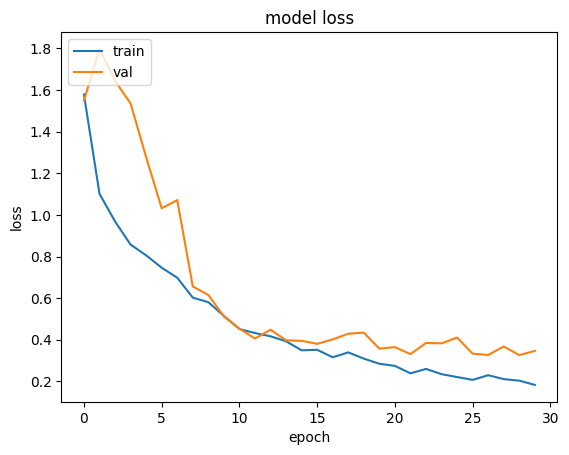

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###Increase Pooling

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(128,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 159, 64)       640       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 159, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 53, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 53, 64)        36928     
                                                                 
 batch_normalization_9 (Bat  (None, 16, 53, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 [==============================] - 11s 18ms/step - loss: 1.1693 - accuracy: 0.5024 - val_loss: 1.4278 - val_accuracy: 0.2323
Epoch 2/100
192/192 [==============================] - 2s 12ms/step - loss: 0.9369 - accuracy: 0.6316 - val_loss: 1.4535 - val_accuracy: 0.2418
Epoch 3/100
192/192 [==============================] - 3s 15ms/step - loss: 0.7935 - accuracy: 0.6991 - val_loss: 1.1554 - val_accuracy: 0.4349
Epoch 4/100
192/192 [==============================] - 2s 13ms/step - loss: 0.6649 - accuracy: 0.7614 - val_loss: 0.6045 - val_accuracy: 0.7802
Epoch 5/100
192/192 [==============================] - 2s 11ms/step - loss: 0.5895 - accuracy: 0.7886 - val_loss: 0.5434 - val_accuracy: 0.7959
Epoch 6/100
192/192 [==============================] - 2s 8ms/step - loss: 0.5112 - accuracy: 0.8174 - val_loss: 0.5573 - val_accuracy: 0.7724
Epoch 7/100
192/192 [==============================] - 1s 7ms/step - loss: 0.4626 - accuracy: 0.8367 - val_loss: 0.6636 - val_accuracy: 

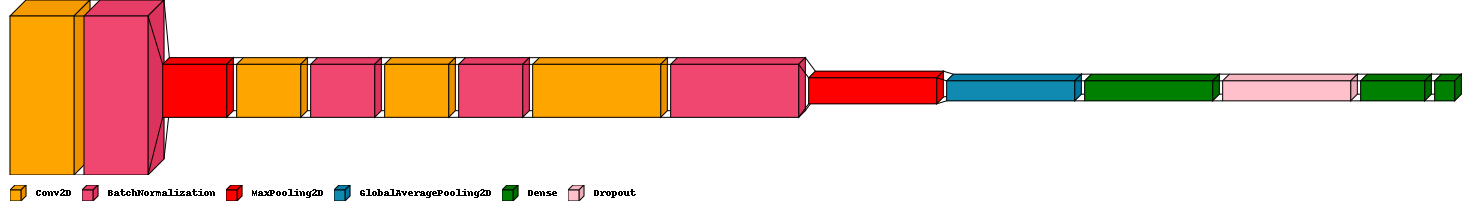

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       160
           1       0.98      0.96      0.97       167
           2       0.96      0.98      0.97       175
           3       0.86      0.94      0.90       136

    accuracy                           0.93       638
   macro avg       0.93      0.93      0.93       638
weighted avg       0.93      0.93      0.93       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 3ms/step
0.9302322723883127
0.9314013674332009
0.9296795409957102


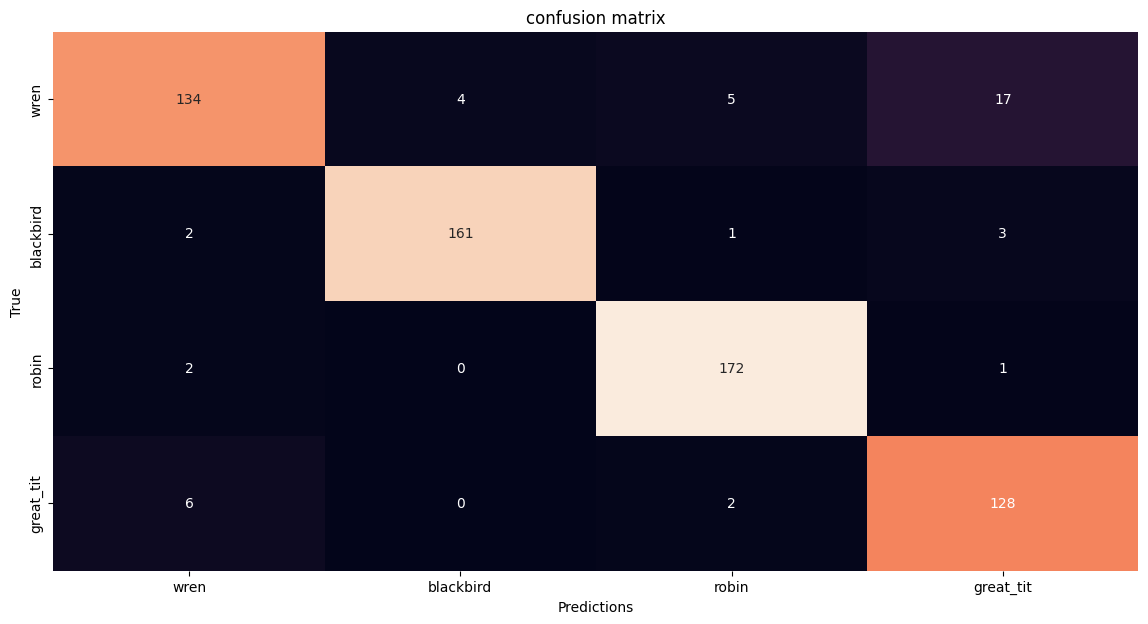

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

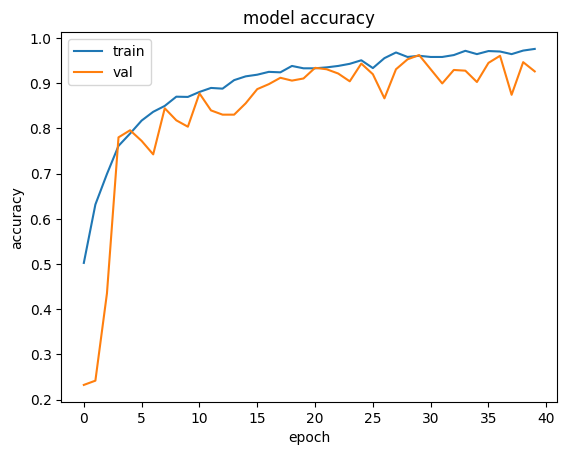

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

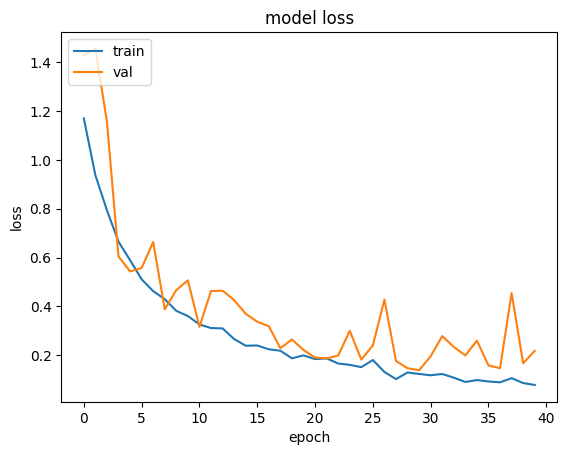

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('model_best_pooling_2.0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Increase Learning Rate to 0.001

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(128,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 159, 64)       640       
                                                                 
 batch_normalization_12 (Ba  (None, 48, 159, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 53, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 53, 64)        36928     
                                                                 
 batch_normalization_13 (Ba  (None, 16, 53, 64)        256       
 tchNormalization)                                               
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
60/60 [==============================] - 9s 16ms/step - loss: 1.0635 - accuracy: 0.5536 - val_loss: 1.4095 - val_accuracy: 0.2747
Epoch 2/100
60/60 [==============================] - 1s 10ms/step - loss: 0.6472 - accuracy: 0.7535 - val_loss: 1.5772 - val_accuracy: 0.2747
Epoch 3/100
60/60 [==============================] - 1s 10ms/step - loss: 0.5091 - accuracy: 0.8090 - val_loss: 2.8301 - val_accuracy: 0.2747
Epoch 4/100
60/60 [==============================] - 1s 11ms/step - loss: 0.4247 - accuracy: 0.8482 - val_loss: 2.4194 - val_accuracy: 0.2747
Epoch 5/100
60/60 [==============================] - 1s 10ms/step - loss: 0.3692 - accuracy: 0.8577 - val_loss: 2.2396 - val_accuracy: 0.2747
Epoch 6/100
60/60 [==============================] - 1s 10ms/step - loss: 0.3074 - accuracy: 0.8849 - val_loss: 3.1102 - val_accuracy: 0.2747
Epoch 7/100
60/60 [==============================] - 1s 9ms/step - loss: 0.2837 - accuracy: 0.9001 - val_loss: 3.3273 - val_accuracy: 0.2779
Epoch 8

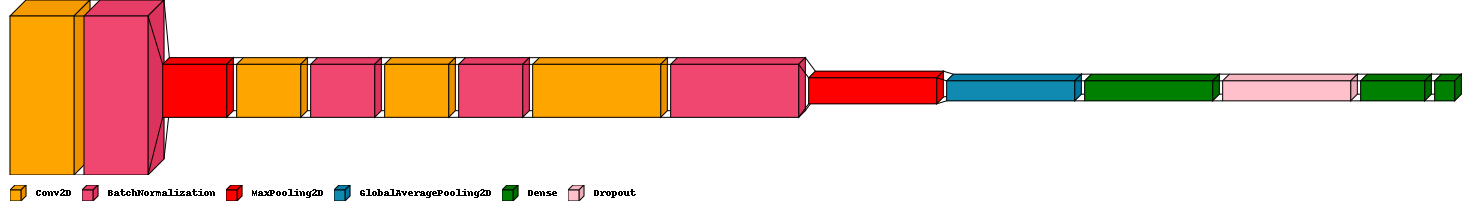

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       160
           1       0.95      0.97      0.96       167
           2       0.96      0.97      0.96       175
           3       0.83      0.95      0.88       136

    accuracy                           0.93       638
   macro avg       0.93      0.93      0.92       638
weighted avg       0.93      0.93      0.93       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 3ms/step
0.9262674217250724
0.9256294658581996
0.9231281305522516


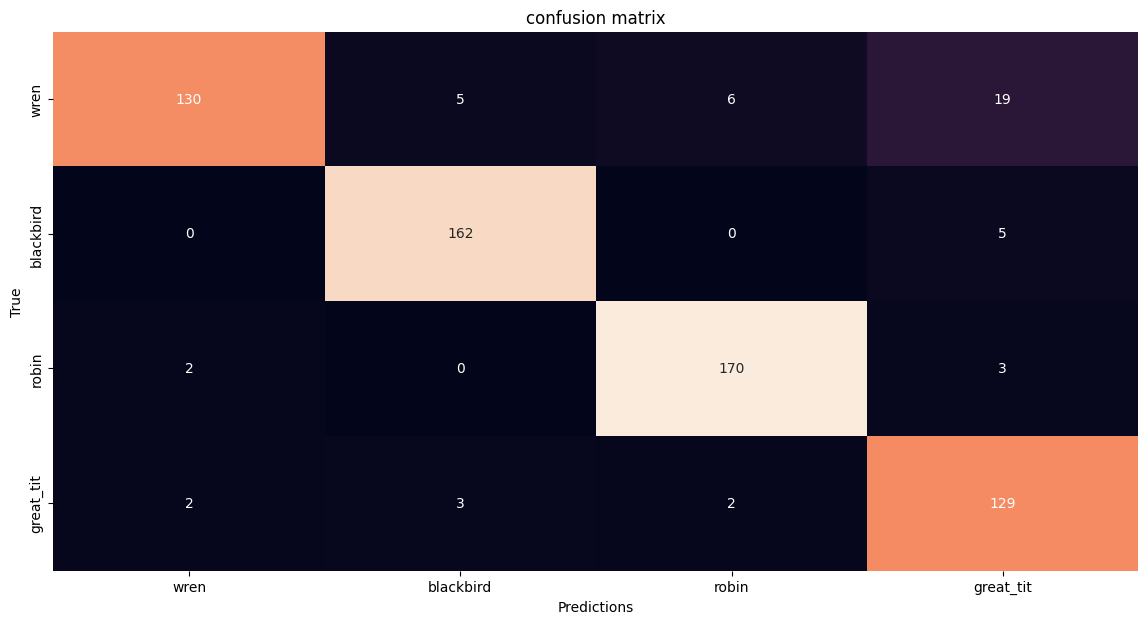

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

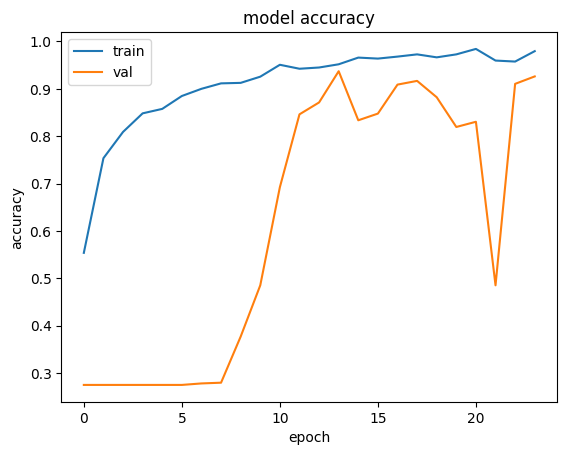

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

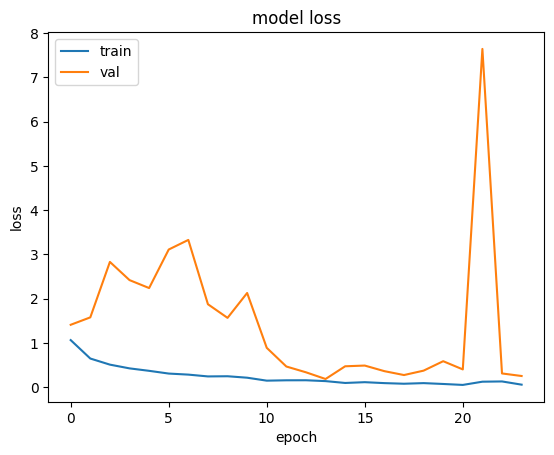

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('model_best_pooling_2.0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Reduce Neurons

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 159, 32)       320       
                                                                 
 batch_normalization_16 (Ba  (None, 48, 159, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 53, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 53, 32)        9248      
                                                                 
 batch_normalization_17 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 [==============================] - 15s 21ms/step - loss: 1.2015 - accuracy: 0.4772 - val_loss: 1.3814 - val_accuracy: 0.2700
Epoch 2/100
192/192 [==============================] - 2s 11ms/step - loss: 0.9424 - accuracy: 0.6259 - val_loss: 1.2999 - val_accuracy: 0.3830
Epoch 3/100
192/192 [==============================] - 2s 13ms/step - loss: 0.8031 - accuracy: 0.6860 - val_loss: 0.8901 - val_accuracy: 0.6374
Epoch 4/100
192/192 [==============================] - 3s 13ms/step - loss: 0.6848 - accuracy: 0.7316 - val_loss: 0.5846 - val_accuracy: 0.7943
Epoch 5/100
192/192 [==============================] - 3s 17ms/step - loss: 0.6263 - accuracy: 0.7619 - val_loss: 0.6446 - val_accuracy: 0.7598
Epoch 6/100
192/192 [==============================] - 2s 12ms/step - loss: 0.5613 - accuracy: 0.7917 - val_loss: 0.4496 - val_accuracy: 0.8383
Epoch 7/100
192/192 [==============================] - 2s 11ms/step - loss: 0.5279 - accuracy: 0.8048 - val_loss: 0.4854 - val_accuracy

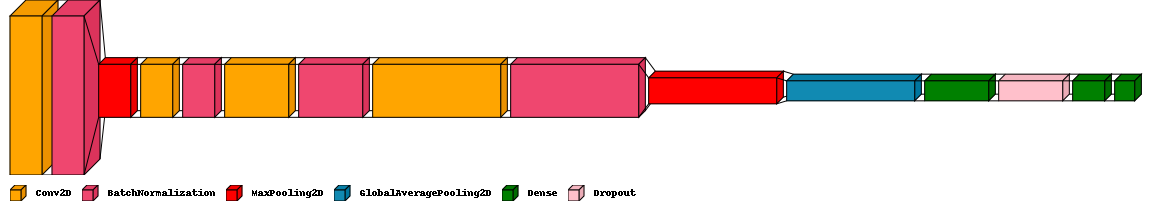

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       160
           1       0.99      0.93      0.96       167
           2       0.96      0.99      0.97       175
           3       0.93      0.94      0.94       136

    accuracy                           0.95       638
   macro avg       0.95      0.95      0.95       638
weighted avg       0.96      0.95      0.95       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 6ms/step
0.9541560617933695
0.9535354029336285
0.9534589541285892


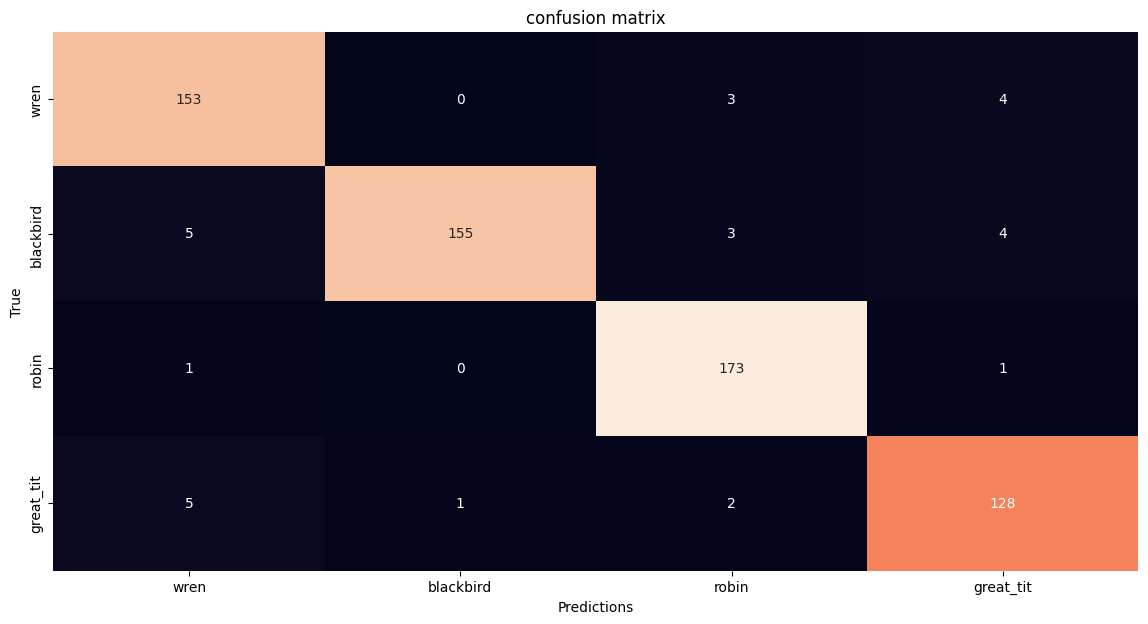

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

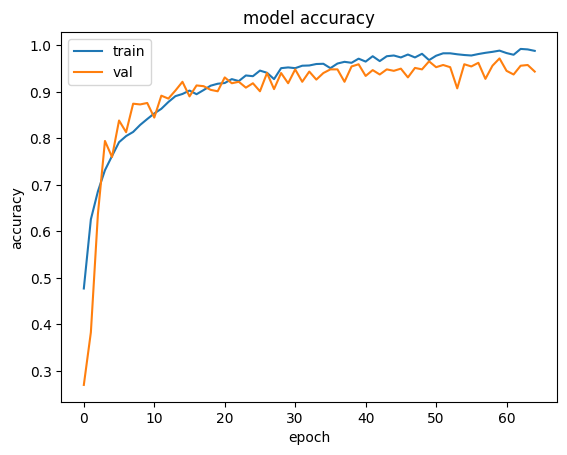

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

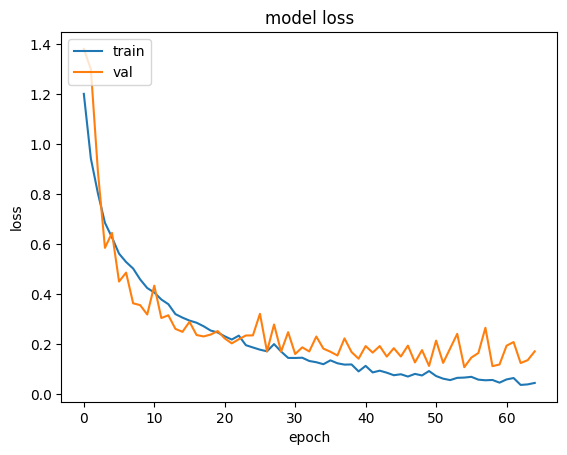

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('model_best_pooling_3.0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Reduce Layers

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 159, 32)       320       
                                                                 
 batch_normalization_20 (Ba  (None, 48, 159, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 53, 64)        18496     
                                                                 
 batch_normalization_21 (Ba  (None, 16, 53, 64)        256       
 tchNormalization)                                               
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 [==============================] - 7s 18ms/step - loss: 1.2671 - accuracy: 0.4349 - val_loss: 1.4132 - val_accuracy: 0.2857
Epoch 2/100
192/192 [==============================] - 2s 12ms/step - loss: 1.0936 - accuracy: 0.5536 - val_loss: 1.4478 - val_accuracy: 0.2732
Epoch 3/100
192/192 [==============================] - 2s 10ms/step - loss: 0.9648 - accuracy: 0.6159 - val_loss: 1.1292 - val_accuracy: 0.4945
Epoch 4/100
192/192 [==============================] - 2s 8ms/step - loss: 0.8763 - accuracy: 0.6630 - val_loss: 0.8791 - val_accuracy: 0.6468
Epoch 5/100
192/192 [==============================] - 1s 7ms/step - loss: 0.7785 - accuracy: 0.7070 - val_loss: 0.7424 - val_accuracy: 0.6954
Epoch 6/100
192/192 [==============================] - 1s 7ms/step - loss: 0.7202 - accuracy: 0.7373 - val_loss: 0.5408 - val_accuracy: 0.8399
Epoch 7/100
192/192 [==============================] - 1s 8ms/step - loss: 0.6579 - accuracy: 0.7582 - val_loss: 0.5531 - val_accuracy: 0.7

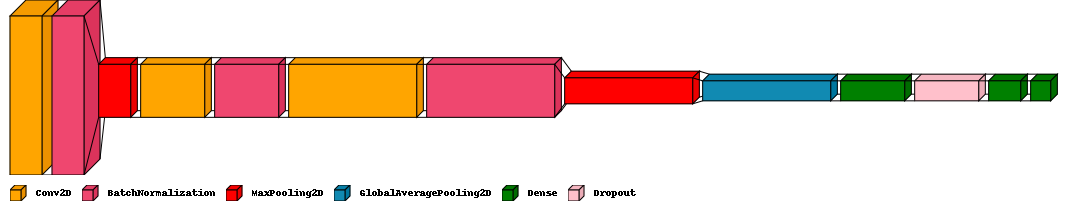

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       160
           1       0.99      0.93      0.96       167
           2       0.94      0.98      0.96       175
           3       0.92      0.96      0.94       136

    accuracy                           0.95       638
   macro avg       0.95      0.95      0.95       638
weighted avg       0.95      0.95      0.95       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.9461629231536464
0.9465422306647211
0.9458944910915805


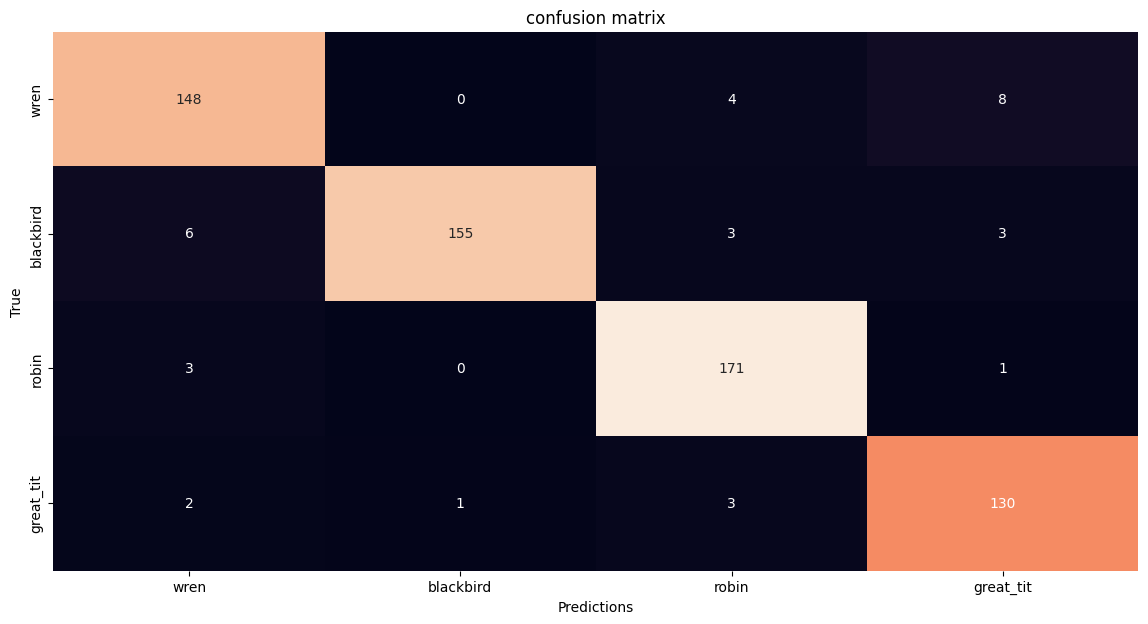

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

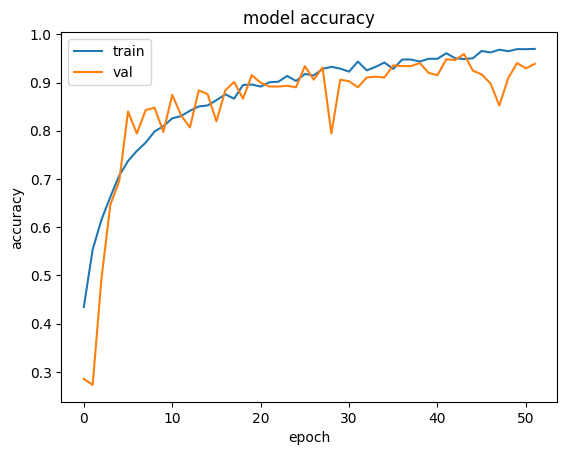

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

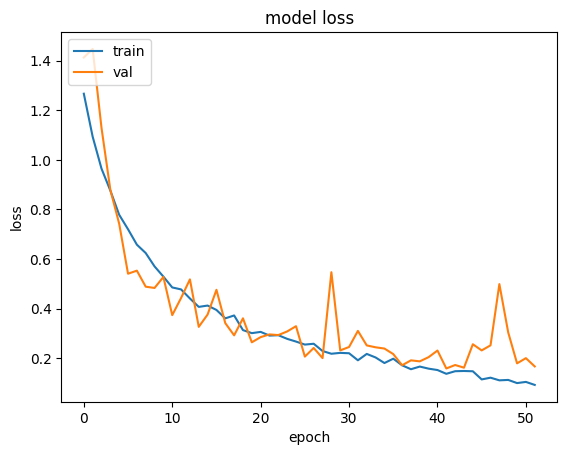

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('model_best_pooling_3.0_reduced_params.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Reduce Neurons and Layers

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 48, 159, 32)       320       
                                                                 
 batch_normalization_23 (Ba  (None, 48, 159, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 53, 32)        9248      
                                                                 
 batch_normalization_24 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 [==============================] - 9s 14ms/step - loss: 1.3408 - accuracy: 0.3893 - val_loss: 1.4345 - val_accuracy: 0.2465
Epoch 2/100
192/192 [==============================] - 3s 14ms/step - loss: 1.1269 - accuracy: 0.5353 - val_loss: 1.4228 - val_accuracy: 0.3736
Epoch 3/100
192/192 [==============================] - 4s 22ms/step - loss: 0.9839 - accuracy: 0.6253 - val_loss: 1.1228 - val_accuracy: 0.5290
Epoch 4/100
192/192 [==============================] - 2s 10ms/step - loss: 0.8943 - accuracy: 0.6515 - val_loss: 0.8311 - val_accuracy: 0.6656
Epoch 5/100
192/192 [==============================] - 2s 11ms/step - loss: 0.8177 - accuracy: 0.7043 - val_loss: 0.6601 - val_accuracy: 0.7849
Epoch 6/100
192/192 [==============================] - 2s 13ms/step - loss: 0.7271 - accuracy: 0.7452 - val_loss: 0.5735 - val_accuracy: 0.8100
Epoch 7/100
192/192 [==============================] - 2s 12ms/step - loss: 0.6624 - accuracy: 0.7603 - val_loss: 0.6619 - val_accuracy:

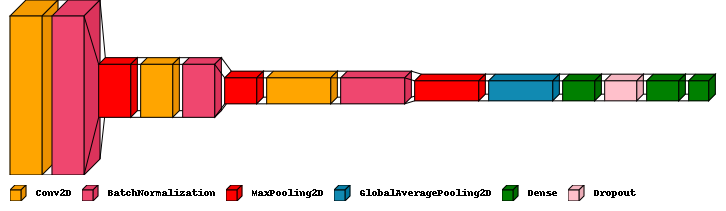

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.95      0.98      0.96       167
           2       0.97      0.95      0.96       175
           3       0.89      0.92      0.91       136

    accuracy                           0.94       638
   macro avg       0.94      0.94      0.94       638
weighted avg       0.94      0.94      0.94       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 3ms/step
0.9365802326328642
0.9374967449554672
0.9368883085277677


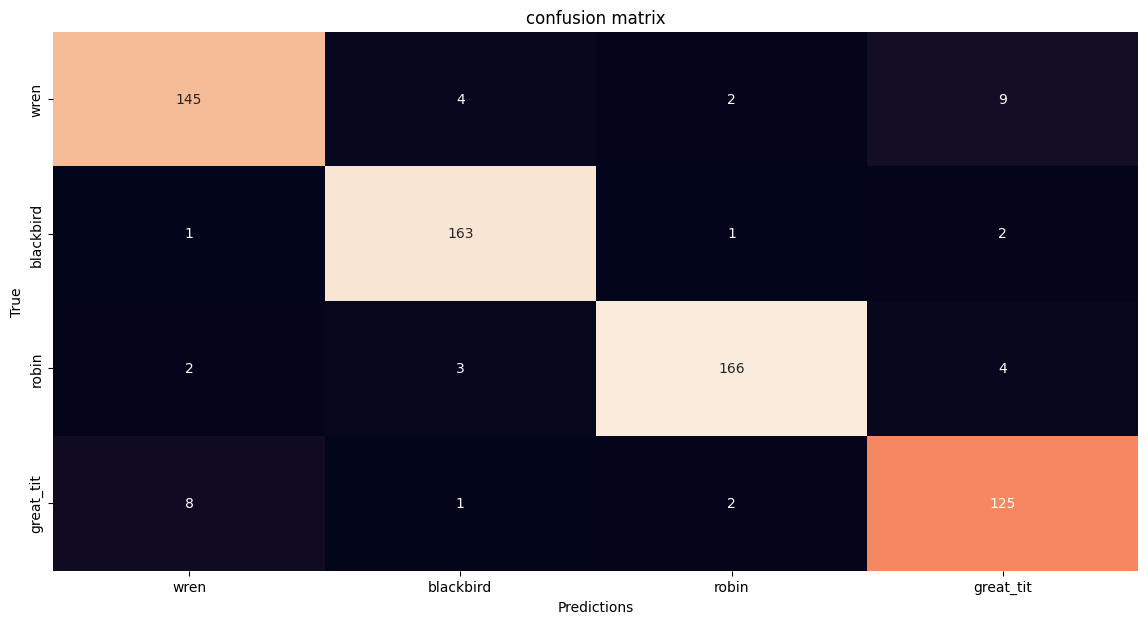

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

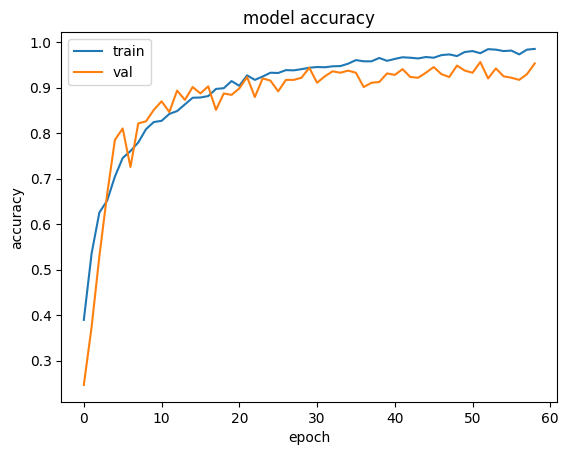

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

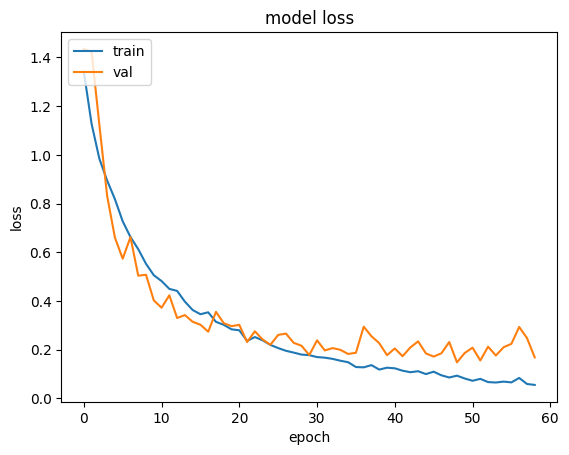

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###Remove Dropout Layer

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 48, 159, 32)       320       
                                                                 
 batch_normalization_34 (Ba  (None, 48, 159, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 16, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 53, 32)        9248      
                                                                 
 batch_normalization_35 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 [==============================] - 26s 9ms/step - loss: 1.1241 - accuracy: 0.5275 - val_loss: 1.4133 - val_accuracy: 0.2323
Epoch 2/100
192/192 [==============================] - 2s 9ms/step - loss: 0.8605 - accuracy: 0.6750 - val_loss: 1.3758 - val_accuracy: 0.3501
Epoch 3/100
192/192 [==============================] - 2s 11ms/step - loss: 0.7196 - accuracy: 0.7446 - val_loss: 1.0237 - val_accuracy: 0.5714
Epoch 4/100
192/192 [==============================] - 2s 9ms/step - loss: 0.6420 - accuracy: 0.7682 - val_loss: 0.6454 - val_accuracy: 0.7347
Epoch 5/100
192/192 [==============================] - 1s 7ms/step - loss: 0.5683 - accuracy: 0.7917 - val_loss: 0.4748 - val_accuracy: 0.8352
Epoch 6/100
192/192 [==============================] - 2s 8ms/step - loss: 0.5063 - accuracy: 0.8163 - val_loss: 0.4190 - val_accuracy: 0.8587
Epoch 7/100
192/192 [==============================] - 2s 8ms/step - loss: 0.4646 - accuracy: 0.8268 - val_loss: 0.4109 - val_accuracy: 0.83

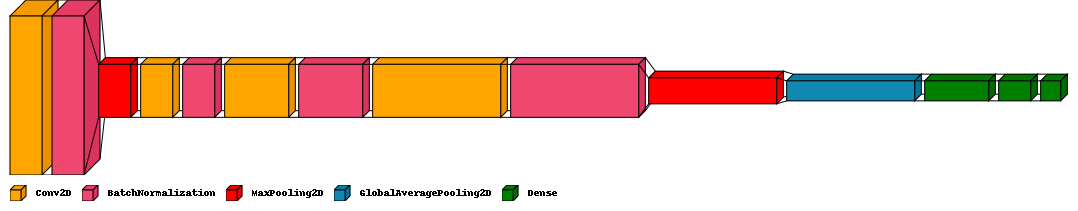

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       160
           1       0.99      0.96      0.97       167
           2       0.96      0.99      0.97       175
           3       0.93      0.97      0.95       136

    accuracy                           0.96       638
   macro avg       0.96      0.96      0.96       638
weighted avg       0.96      0.96      0.96       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 3ms/step
0.9633847249287699
0.9635519454787903
0.9630506964410179


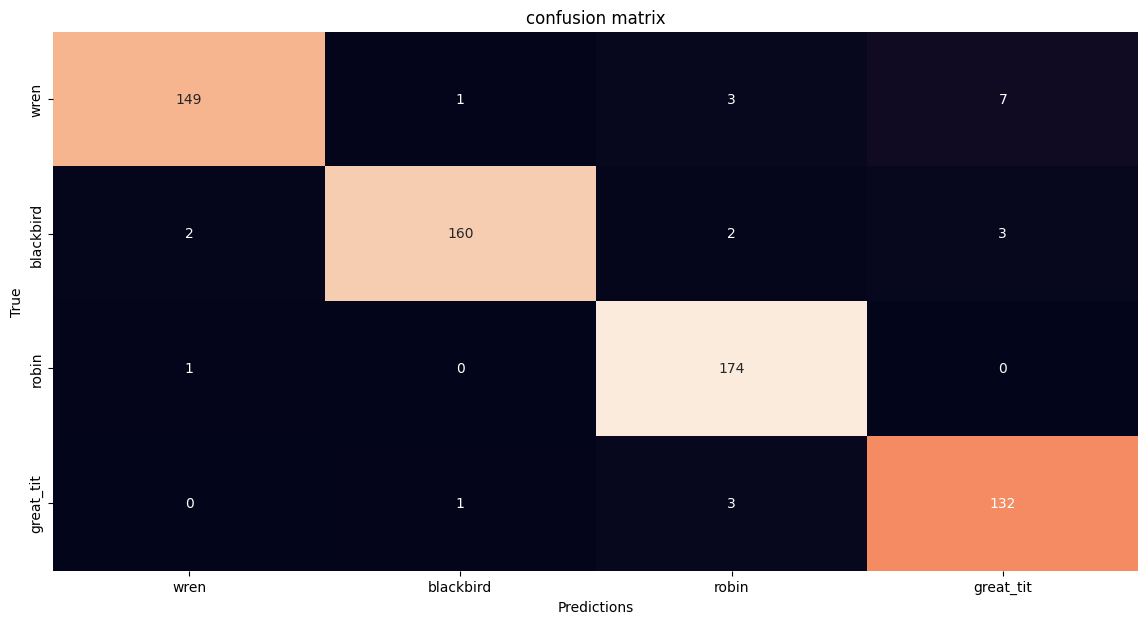

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

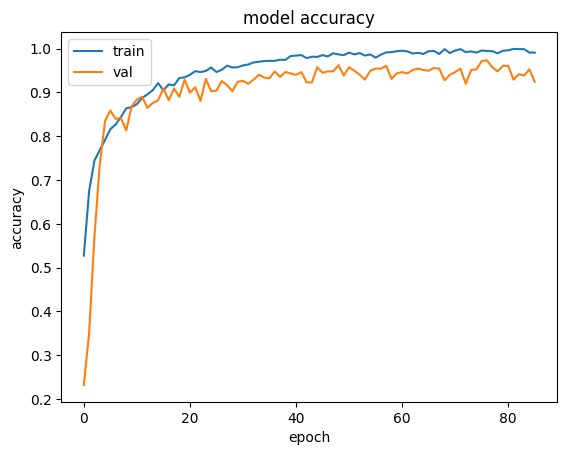

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

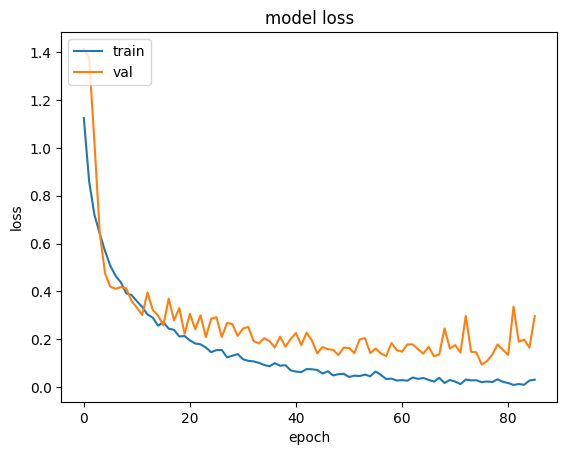

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('model_best_pooling_4.0_possible_overfit.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Best Architecture But With Flattening Layer

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 48, 159, 32)       320       
                                                                 
 batch_normalization_30 (Ba  (None, 48, 159, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 16, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 53, 32)        9248      
                                                                 
 batch_normalization_31 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
192/192 [==============================] - 8s 14ms/step - loss: 1.0018 - accuracy: 0.6081 - val_loss: 3.5233 - val_accuracy: 0.2465
Epoch 2/100
192/192 [==============================] - 2s 13ms/step - loss: 0.5717 - accuracy: 0.7912 - val_loss: 0.9496 - val_accuracy: 0.6044
Epoch 3/100
192/192 [==============================] - 3s 16ms/step - loss: 0.4078 - accuracy: 0.8577 - val_loss: 0.4682 - val_accuracy: 0.8524
Epoch 4/100
192/192 [==============================] - 2s 12ms/step - loss: 0.2888 - accuracy: 0.8969 - val_loss: 0.3886 - val_accuracy: 0.8634
Epoch 5/100
192/192 [==============================] - 2s 12ms/step - loss: 0.2179 - accuracy: 0.9267 - val_loss: 0.3341 - val_accuracy: 0.8964
Epoch 6/100
192/192 [==============================] - 2s 12ms/step - loss: 0.2279 - accuracy: 0.9220 - val_loss: 0.3548 - val_accuracy: 0.8728
Epoch 7/100
192/192 [==============================] - 2s 12ms/step - loss: 0.1455 - accuracy: 0.9482 - val_loss: 0.3759 - val_accuracy:

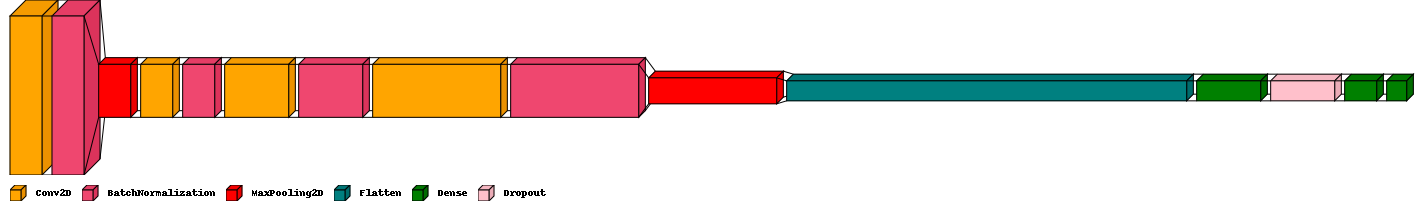

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       160
           1       0.96      0.93      0.95       167
           2       0.89      0.94      0.91       175
           3       0.84      0.86      0.85       136

    accuracy                           0.89       638
   macro avg       0.89      0.89      0.89       638
weighted avg       0.90      0.89      0.89       638



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

20/20 [==============================] - 0s 2ms/step
0.893283814880416
0.892198743269763
0.8922832062314192


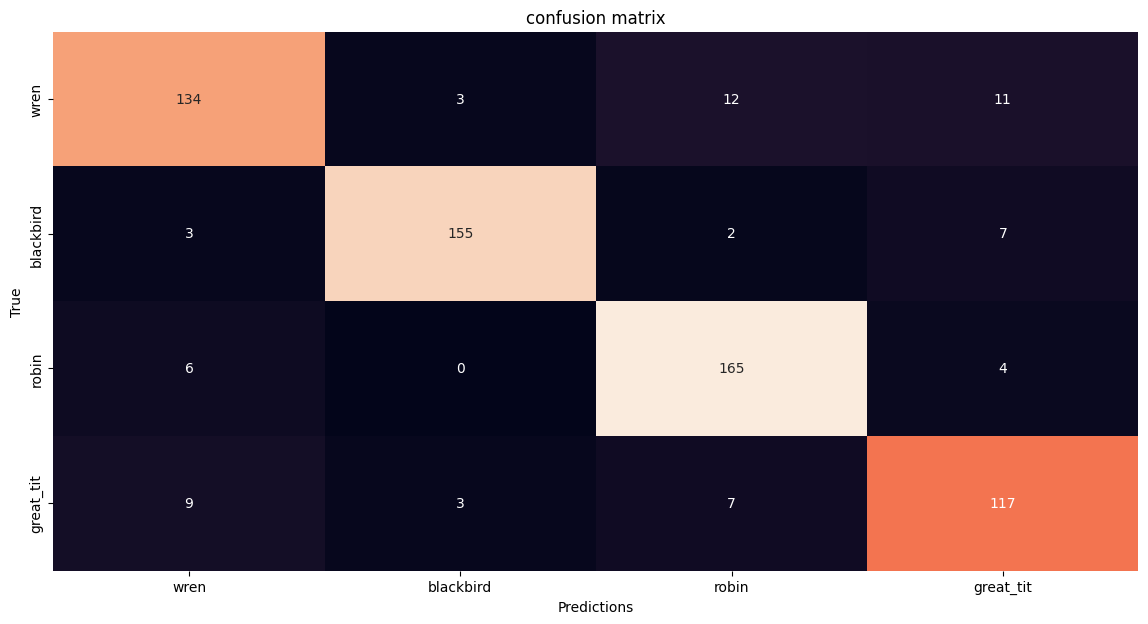

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

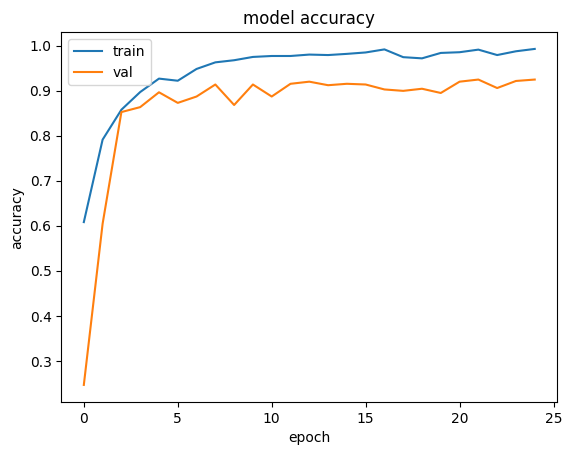

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

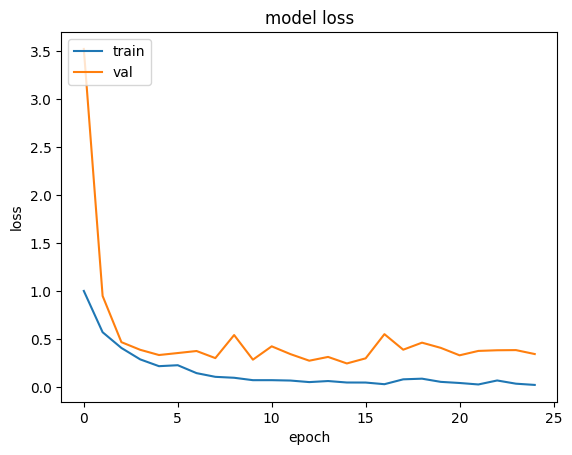

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Trialling Augmented Data

###Data Preperation

Creating a function called augmentAndSave() to perform Noise Injection and masking on spectrogram images.

In [ ]:
def augmentAndSave(folder, save_to):
  audio_files = os.listdir('/content/drive/MyDrive/DP_DATASET/' + folder)
  for audio in audio_files[:300]:
    birdcall, sr = librosa.load('/content/drive/MyDrive/DP_DATASET/' + folder + '/' + audio, sr=32000)
    hop_length = 1007
    S = librosa.feature.melspectrogram(y=birdcall, sr=32000, n_fft=1024, hop_length=hop_length, n_mels=48, fmin=500, fmax=12500)
    mel_spec = librosa.power_to_db(S, ref=np.max)
    # Normalize
    mel_spec -= mel_spec.min()
    mel_spec /= mel_spec.max()
    num_time_steps = mel_spec.shape[1]
    #adding masking
    mask_length = np.random.randint(0, 10)
    start_time = np.random.randint(0, num_time_steps - mask_length)
    end_time = start_time + mask_length
    mel_spec[:, start_time:end_time] = 0
    freq_mask_decision = np.random.randint(0, 10)
    if(freq_mask_decision % 2 == 0):
          num_mel_channels = mel_spec.shape[0]
          start_channel = np.random.randint(0, num_mel_channels - mask_length)
          end_channel = start_channel + mask_length
          mel_spec[start_channel:end_channel, :] = 0
    save_path = '/content/drive/MyDrive/DP_DATASET/' + save_to + '/' + audio + '.png'
    im = Image.fromarray(mel_spec * 255.0).convert("L")
    im.save(save_path)
  for audio in audio_files[300:600]:
      birdcall, sr = librosa.load('/content/drive/MyDrive/DP_DATASET/' + folder + '/' + audio, sr=32000)
      hop_length = 1007
      S = librosa.feature.melspectrogram(y=birdcall, sr=32000, n_fft=1024, hop_length=hop_length, n_mels=48, fmin=500, fmax=12500)
      mel_spec = librosa.power_to_db(S, ref=np.max)
      # Normalize
      mel_spec -= mel_spec.min()
      mel_spec /= mel_spec.max()
      im = Image.fromarray(mel_spec * 255.0).convert("L")
      image=np.array(im)
      # Genearte noise with same shape as that of the image
      noise_amount = np.random.randint(0, 40)
      noise = np.random.normal(0, noise_amount, image.shape)
      # Add the noise to the image
      img_noised = image + noise
      # Clip the pixel values to be between 0 and 255.
      img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)
      save_path = (f'/content/drive/MyDrive/DP_DATASET/{save_to}/{audio}.png')
      im = Image.fromarray(img_noised).convert("L")
      im.save(save_path)

Loading the data

In [ ]:
augmentAndSave("WREN_SPEC","wren_augment2")
augmentAndSave("ROBIN_SPEC", "robin_augment2")
augmentAndSave("GTIT_SPEC", "gtit_augment2")
augmentAndSave("BLACKBIRD_SPEC", "blackbird_augment2")

In [ ]:
wren = []
blackbird = []
robin = []
great_tit = []

readSpectrograms("wren_spectrogram", wren)
readSpectrograms("blackbird_spectrogram", blackbird)
readSpectrograms("robin_spectrogram", robin)
readSpectrograms("gtit_spectrogram", great_tit)
readSpectrograms("wren_augment2", wren)
readSpectrograms("blackbird_augment2", blackbird)
readSpectrograms("robin_augment2", robin)
readSpectrograms("gtit_augment2", great_tit)


y = [] #list of labels

for i in range(len(wren)):
  y.append(0)
for i in range(len(blackbird)):
  y.append(1)
for i in range(len(robin)):
  y.append(2)
for i in range(len(great_tit)):
  y.append(3)

y = np.array(y)



wren = np.array(wren, dtype='float32')
for spec in wren:
  spec -= spec.min()
  spec /= spec.max()
  if not spec.max() == 1.0 or not spec.min() == 0.0:
    continue
  spec = np.expand_dims(spec, -1)

blackbird = np.array(blackbird, dtype='float32')
for spec in blackbird:
  spec -= spec.min()
  spec /= spec.max()
  if not spec.max() == 1.0 or not spec.min() == 0.0:
    continue
  spec = np.expand_dims(spec, -1)

robin = np.array(robin, dtype='float32')
for spec in robin:
  spec -= spec.min()
  spec /= spec.max()
  if not spec.max() == 1.0 or not spec.min() == 0.0:
    continue
  spec = np.expand_dims(spec, -1)

great_tit = np.array(great_tit, dtype='float32')
for spec in great_tit:
  spec -= spec.min()
  spec /= spec.max()
  if not spec.max() == 1.0 or not spec.min() == 0.0:
    continue
  spec = np.expand_dims(spec, -1)

Data = np.concatenate([wren, blackbird, robin, great_tit])

X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.2, random_state=77, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=77, shuffle=True)

###Model Training

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 159, 32)       320       
                                                                 
 batch_normalization_16 (Ba  (None, 48, 159, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 53, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 53, 32)        9248      
                                                                 
 batch_normalization_17 (Ba  (None, 16, 53, 32)        128       
 tchNormalization)                                               
                                                      

In [ ]:
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
          loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])

# Train the model and store history
history = CNN_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val,y_val),callbacks=callbacks)

Epoch 1/100
336/336 [==============================] - 6s 8ms/step - loss: 1.2202 - accuracy: 0.4700 - val_loss: 1.3849 - val_accuracy: 0.3859
Epoch 2/100
336/336 [==============================] - 2s 7ms/step - loss: 0.9425 - accuracy: 0.6138 - val_loss: 0.8283 - val_accuracy: 0.6625
Epoch 3/100
336/336 [==============================] - 3s 8ms/step - loss: 0.7835 - accuracy: 0.6914 - val_loss: 0.7390 - val_accuracy: 0.7090
Epoch 4/100
336/336 [==============================] - 3s 9ms/step - loss: 0.6994 - accuracy: 0.7314 - val_loss: 0.5655 - val_accuracy: 0.7959
Epoch 5/100
336/336 [==============================] - 2s 7ms/step - loss: 0.6282 - accuracy: 0.7613 - val_loss: 0.5338 - val_accuracy: 0.7896
Epoch 6/100
336/336 [==============================] - 2s 7ms/step - loss: 0.5891 - accuracy: 0.7848 - val_loss: 0.4707 - val_accuracy: 0.8263
Epoch 7/100
336/336 [==============================] - 2s 7ms/step - loss: 0.5169 - accuracy: 0.8120 - val_loss: 0.4000 - val_accuracy: 0.8630

In [ ]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

18/18 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       291
           1       0.99      0.96      0.98       273
           2       0.96      0.98      0.97       276
           3       0.94      0.98      0.96       278

    accuracy                           0.97      1118
   macro avg       0.97      0.97      0.97      1118
weighted avg       0.97      0.97      0.97      1118



In [ ]:
y_pred1 = CNN_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

35/35 [==============================] - 0s 2ms/step
0.9666464338425287
0.9662498499729925
0.9661952040415503


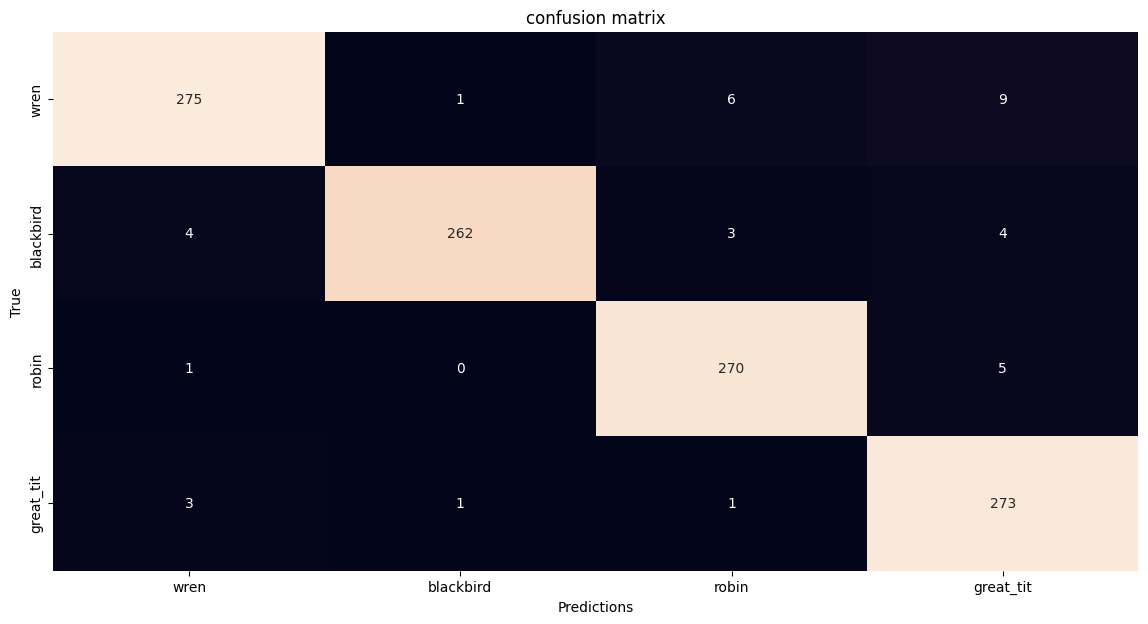

In [ ]:
y_predictions = [np.argmax(arr) for arr in y_pred1]
cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(14, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.ylabel("True")
plt.xlabel("Predictions")
plt.title("confusion matrix")
ax.xaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
ax.yaxis.set_ticklabels(['wren', 'blackbird', 'robin', 'great_tit']);
plt.show()

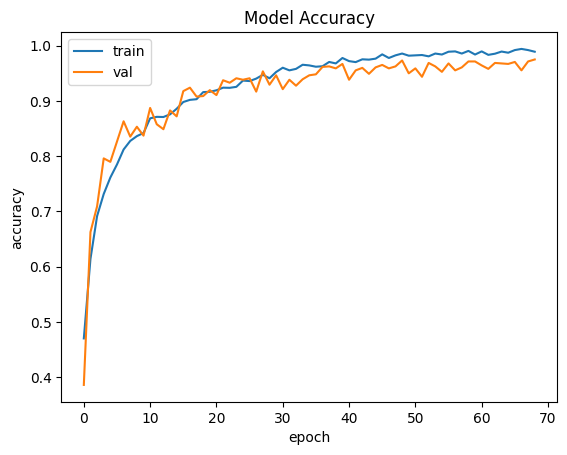

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

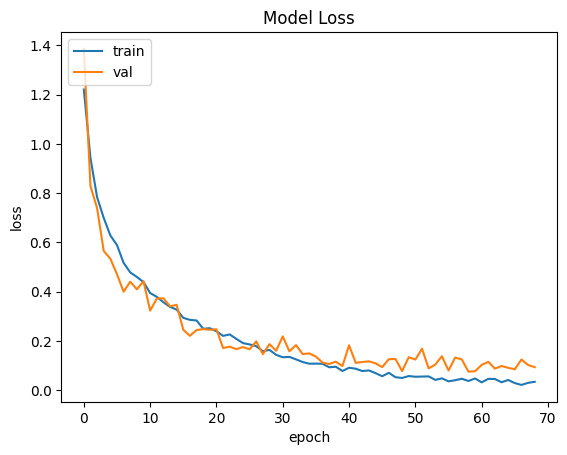

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
CNN_model.save('c1025903_model_submission.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Parameter Comparison

In [ ]:
CNN_model = Sequential()
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same',input_shape=[48,159,1]))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(3))
CNN_model.add(keras.layers.Conv2D(32,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(64,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPool2D(2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(64,activation='relu'))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Dense(32,activation='relu'))
CNN_model.add(keras.layers.Dense(4,activation='softmax'))
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 159, 32)       320       
                                                                 
 batch_normalization (Batch  (None, 48, 159, 32)       128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 53, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 53, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 53, 32)        128       
 chNormalization)                                                
                                                        

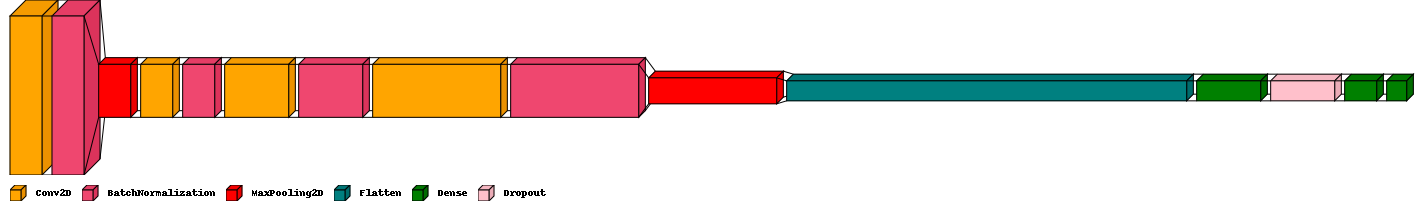

In [ ]:
visualkeras.layered_view(CNN_model,  scale_xy=1, scale_z=1, max_z=400, legend=True, color_map = color_map)